<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Simple-linear-regression" data-toc-modified-id="Simple-linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Simple linear regression</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Why-does-the-error-term-have-a-mean-(&quot;loc&quot;)-of-0?" data-toc-modified-id="Discussion:-Why-does-the-error-term-have-a-mean-(&quot;loc&quot;)-of-0?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Discussion: Why does the error term have a mean ("loc") of 0?</a></span></li><li><span><a href="#Discussion:-What-is-$g$-a-function-of?-Are-$\bar{\bar{X}}$-and-$\vec{y}$-variables?" data-toc-modified-id="Discussion:-What-is-$g$-a-function-of?-Are-$\bar{\bar{X}}$-and-$\vec{y}$-variables?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Discussion: What is $g$ a function of? Are $\bar{\bar{X}}$ and $\vec{y}$ variables?</a></span></li></ul></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Polynomial Regression</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Compute-the-sum-of-squared-errors-($g$)-as-a-function-of-the-order-of-the-polynomial-used-to-fit-the-data." data-toc-modified-id="Exercise:-Compute-the-sum-of-squared-errors-($g$)-as-a-function-of-the-order-of-the-polynomial-used-to-fit-the-data.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise: Compute the sum of squared errors ($g$) as a function of the order of the polynomial used to fit the data.</a></span></li><li><span><a href="#Discussion:-What-happens-as-the-order-is-increased?-Does-the-model-always-improve?" data-toc-modified-id="Discussion:-What-happens-as-the-order-is-increased?-Does-the-model-always-improve?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Discussion: What happens as the order is increased? Does the model always improve?</a></span></li></ul></li><li><span><a href="#General-Linear-Regression" data-toc-modified-id="General-Linear-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>General Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Plot-the-Gaussian-basis-functions-used-in-the-previous-code-block." data-toc-modified-id="Exercise:-Plot-the-Gaussian-basis-functions-used-in-the-previous-code-block.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise: Plot the Gaussian basis functions used in the previous code block.</a></span></li></ul></li><li><span><a href="#Linear-Regression-in-Scikit-Learn" data-toc-modified-id="Linear-Regression-in-Scikit-Learn-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Linear Regression in Scikit-Learn</a></span></li></ul></div>

# Linear Regression

## Simple linear regression

Linear regression is a great starting point for understanding how linear algebra and optimization are used together for data analytics. We will start with simple linear regression, which you should be familiar with.

The form of a simple linear regression model is given as:

$y = mx + b + \epsilon$

where the $y$ is the independent value, $x$ is the dependent value, $m$ is the slope of the line, $b$ is the intercept, and $\epsilon$ is the "error"  between the model and the actual data. This can also be written with indices on the data:

$y_i = mx_i + b + \epsilon_i$

where $i$ refers to the index of the data point (e.g. the first, second, third, ... data point). We can also think of these quantities as vectors:

$\vec{y} = m\vec{x} + b + \vec{\epsilon}$

To make things consistent with prior lectures, we can re-write this as:

$y_i = w_0x_i^0 + w_1 x_i^1 + \epsilon_i$

where $w_0 = b$ and $w_1 = m$. Now we can re-write this as a matrix-vector product:

$y_i = \sum_{j=0}^1 w_j x_i^{\:j} + \epsilon_i$

If you recall the Vandermonde matrix, this can be written as:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

where $\bar{\bar{X}}$ is the first-order Vandermonde matrix. We can create a dataset that satisfies this model using `numpy`:

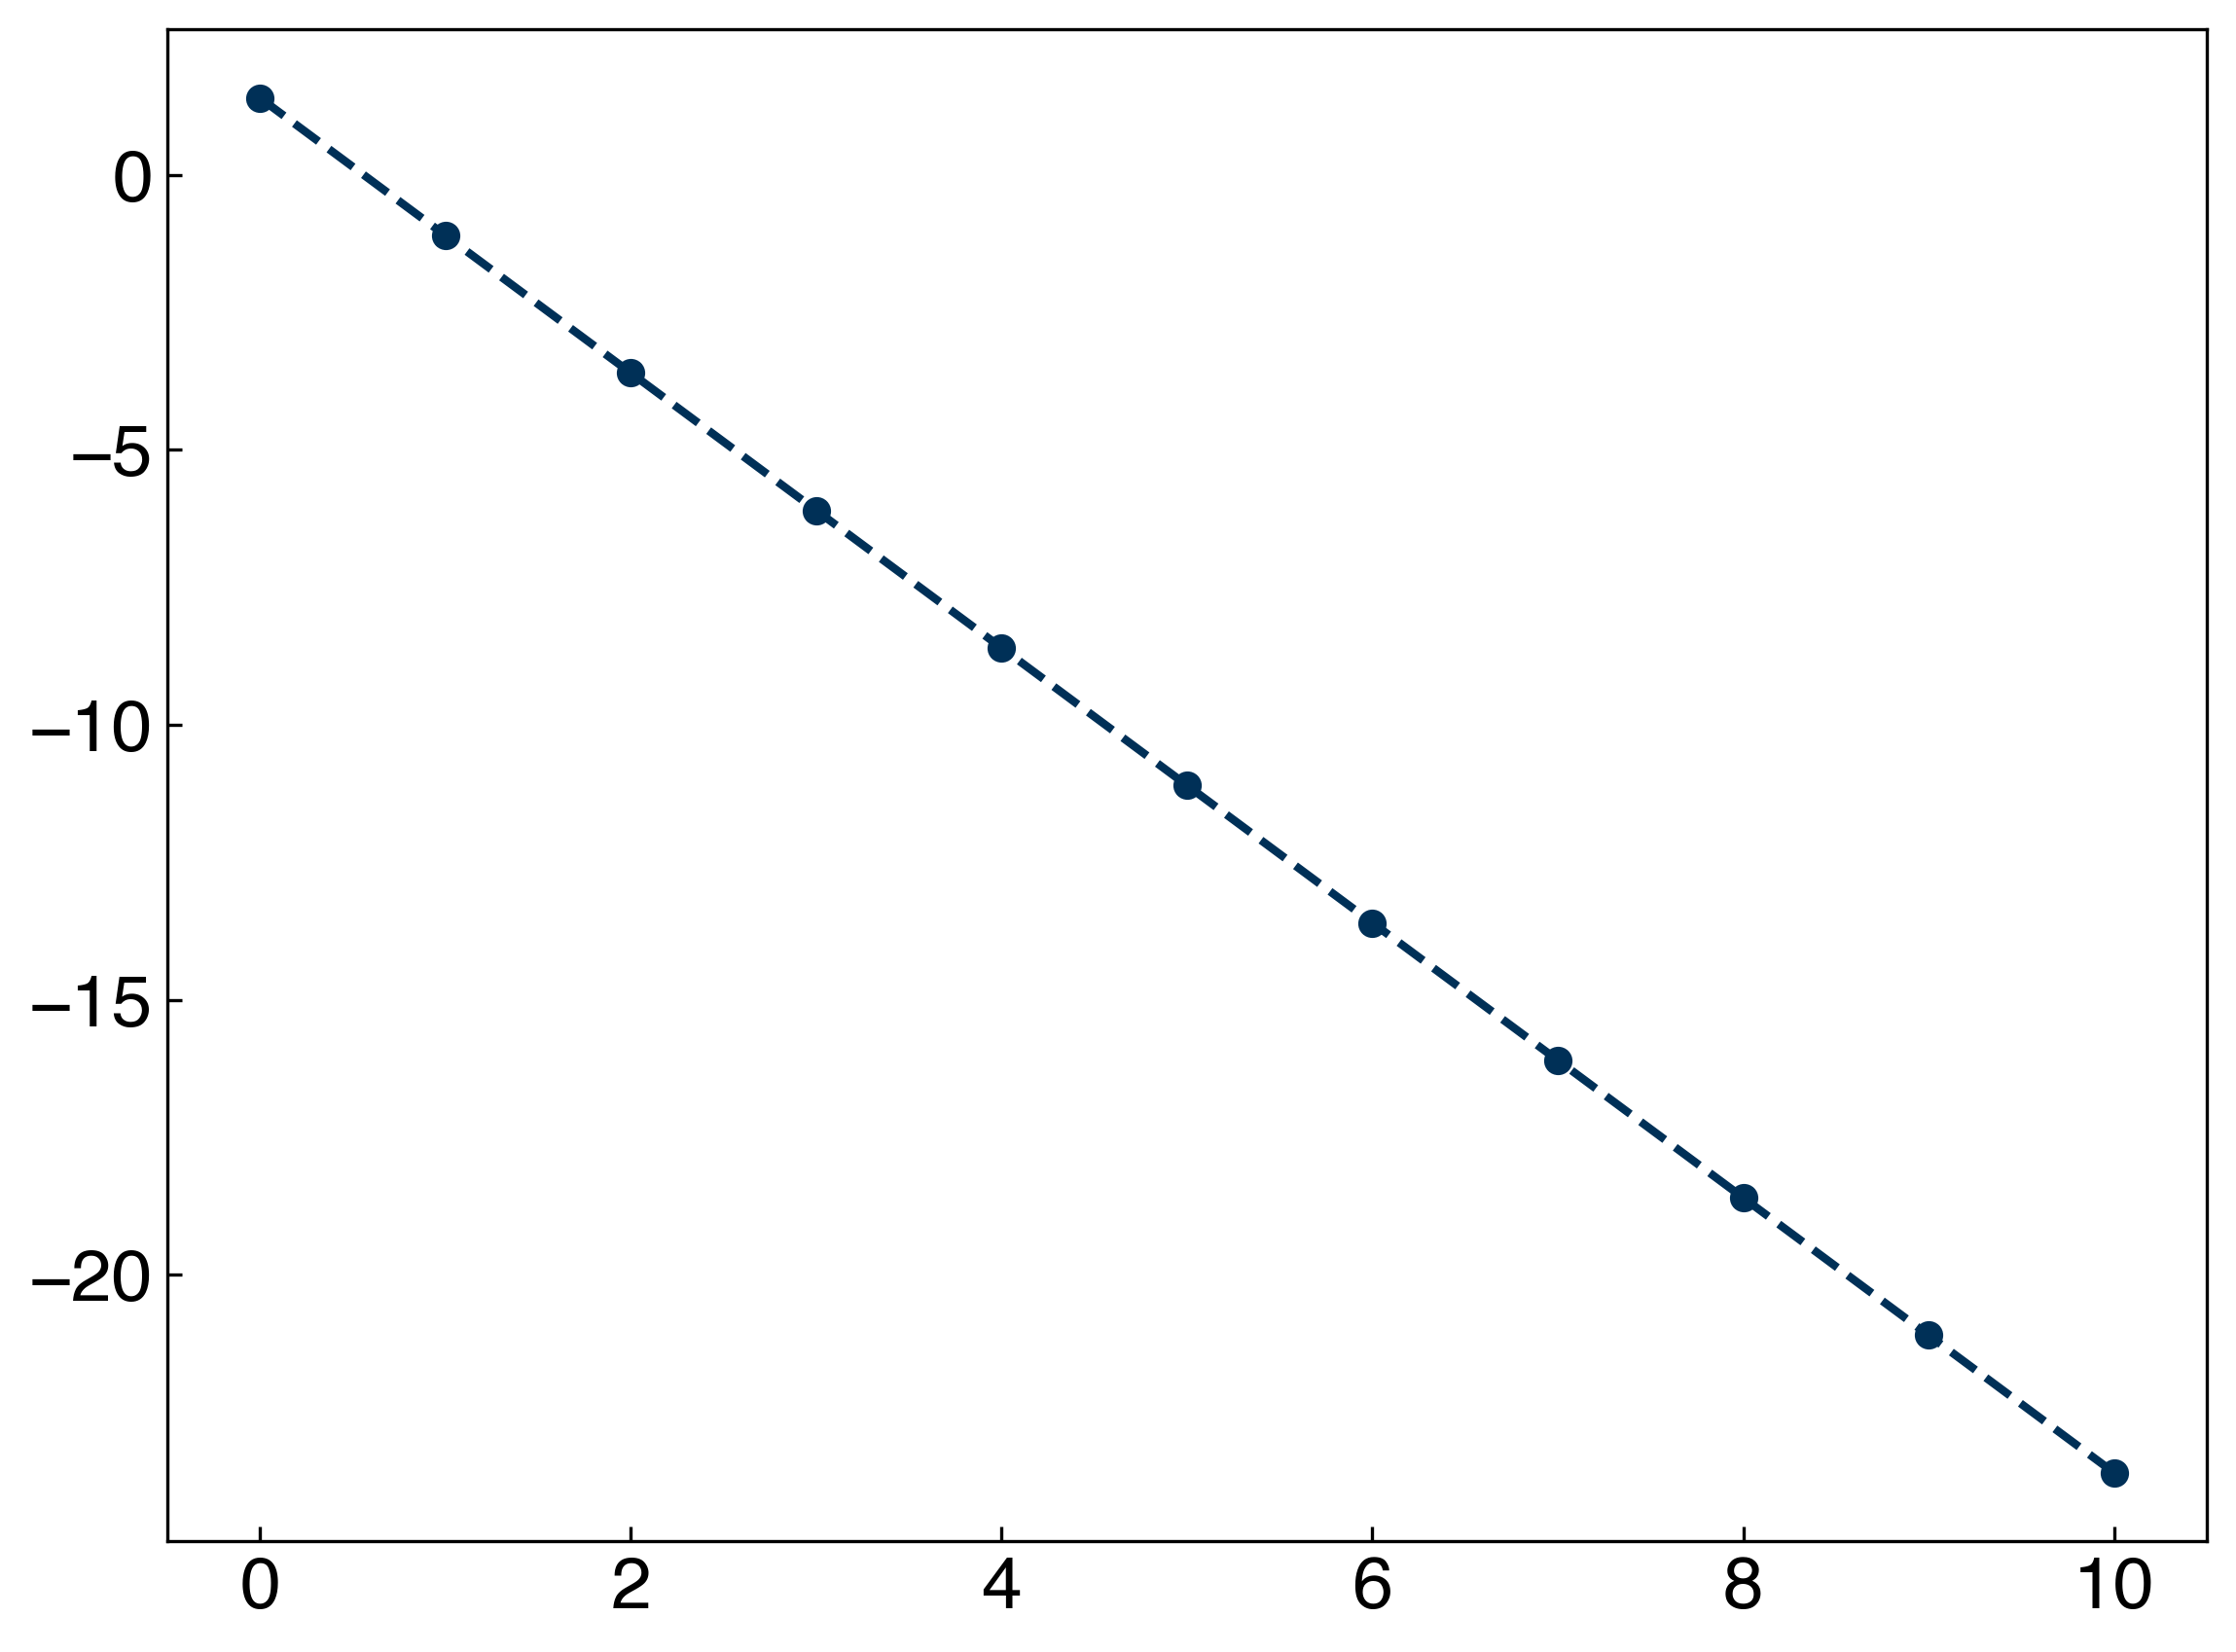

In [1]:
%matplotlib inline
import numpy as np
import pylab as plt
plt.style.use('../settings/plot_style.mplstyle')

x = np.linspace(0,10,11)
x = x.reshape(-1, 1) #make x into a column vector
w = [1.4, -2.5]

X = np.hstack((x**0, x))
y = X@w

fig, ax = plt.subplots()
ax.plot(x, y, '--o');

We are still missing the $\epsilon$ term. This is the error, and in linear regression we assume that the error follows a normal distribution. Hopefully you remember normal distributions from your stats class. We can generate a vector of normally-distributed noise using `numpy` and add it to $\vec{y}$:

In [2]:
from numpy.random import normal
#help(normal)
epsilon = normal(0, 0.1, len(x))

### Discussion: Why does the error term have a mean ("loc") of 0?

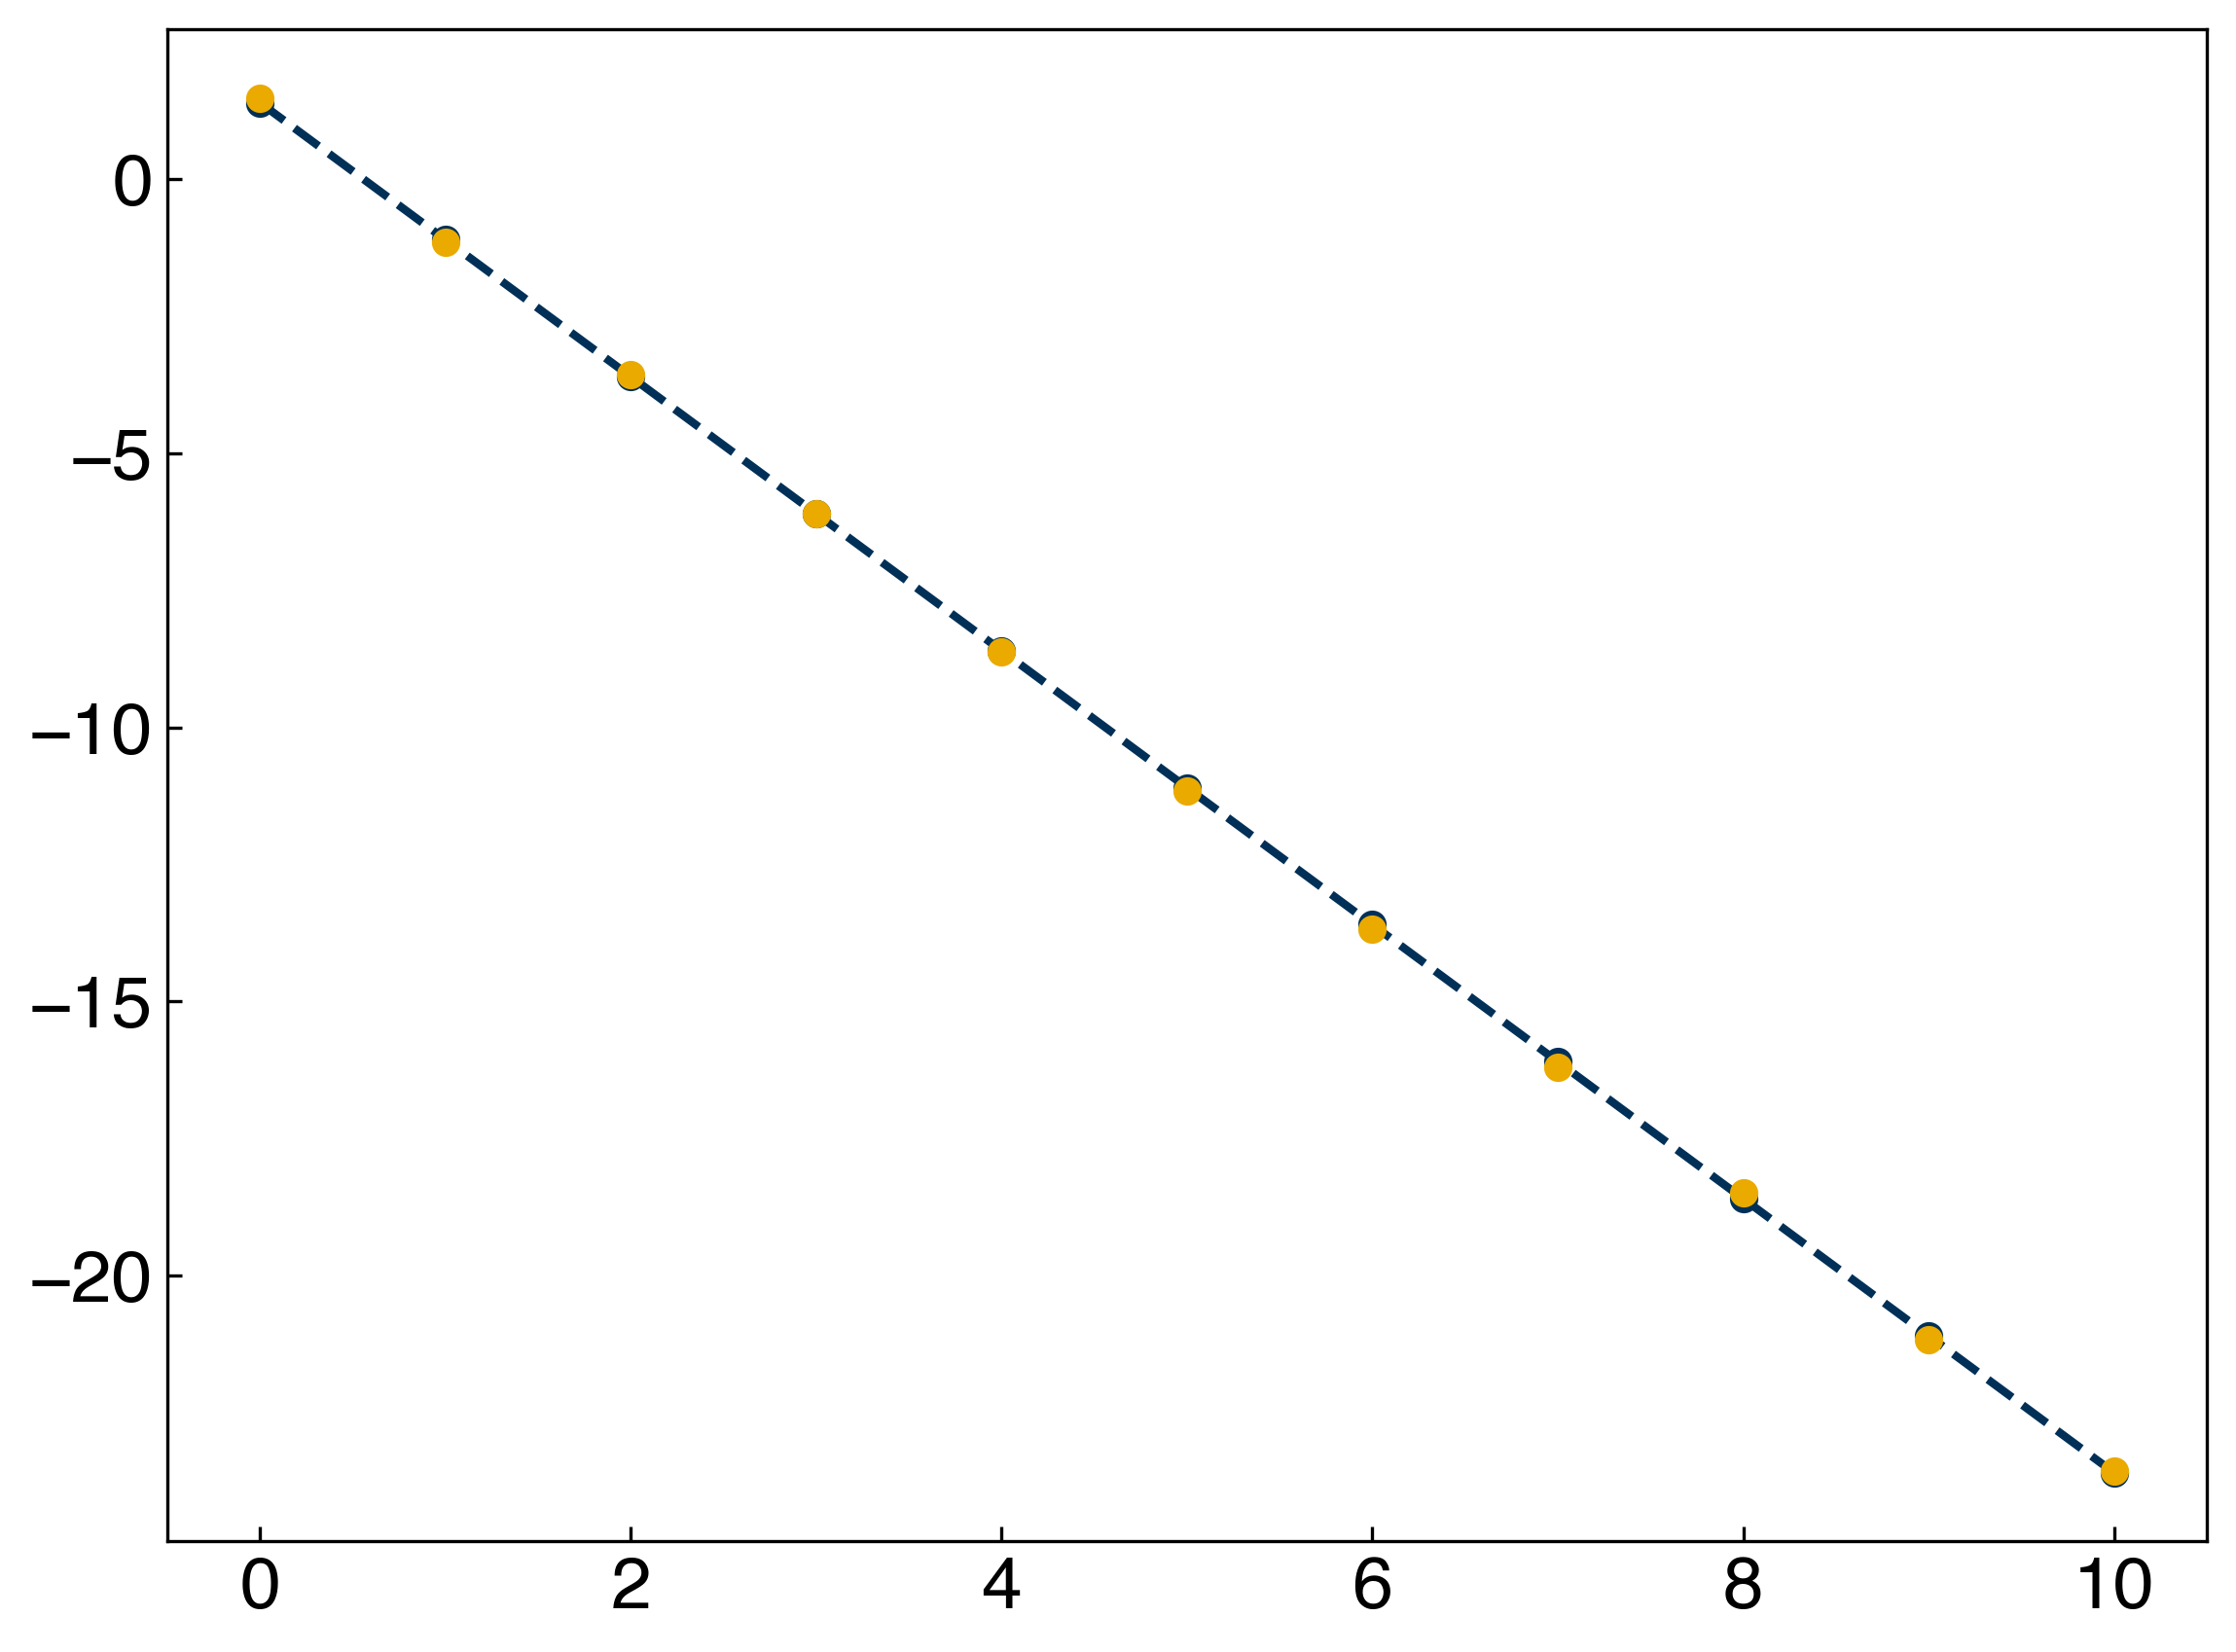

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y, '--o')
y = y + epsilon
ax.plot(x, y, 'o');

The goal of linear regression is to use the data, $y_i$ to recover the "best fit" line. In this case, we know the answer since we generated the data. However, we can also try to recover the line based only on the noisy data.

There are multiple ways to derive linear regression, but here we will derive it by minimizing the sum of squared errors. This is the origin of the name "least squares": we want to find the line that gives the lowest squared errors. First, we will set up a "cost function" that quantifies the squared errors:

$g = \sum_j \epsilon_j^2$

Next, we can recall the definition of an inner product to see that $\sum_j \epsilon_j^2 = \vec{\epsilon}^T \vec{\epsilon}$, so:

$g = \vec{\epsilon}^T \vec{\epsilon}$.

Next, we can re-arrange our expression for the model to solve for $\vec{\epsilon}$:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon} \Rightarrow \vec{\epsilon} = \vec{y} - \bar{\bar{X}}\vec{w} $

Next we substitute this into the loss function

$g = \vec{\epsilon}^T\cdot\vec{\epsilon} = (\vec{y} - \bar{\bar{X}}\vec{w})^T(\vec{y} - \bar{\bar{X}}\vec{w})$

Recalling matrix transpose rules:

$(\vec{y} - \bar{\bar{X}}\vec{w})^T(\vec{y} - \bar{\bar{X}}\vec{w}) =  (\vec{y}^T - \vec{w}^T\bar{\bar{X}}^T)(\vec{y} - \bar{\bar{X}}\vec{w})$

and multiplying:

$\vec{w}^T\bar{\bar{X}}^T\bar{\bar{X}}\vec{w} - \vec{y}^T\bar{\bar{X}}\vec{w} - \vec{w}^T\bar{\bar{X}}^T\vec{y} + \vec{y}^T\vec{y}$

the middle two terms are both dot products of $\vec{y}^T(\bar{\bar{X}}\vec{w})$ or $(\bar{\bar{X}}\vec{w})^T\vec{y}$, which are transposes of each other, and scalar quantities. The transpose of a scalar is equal to the same scalar, so these terms are equal and can be combined giving:

$g = \vec{\epsilon}^T\cdot\vec{\epsilon} = \vec{w}^T\bar{\bar{X}}^T\bar{\bar{X}}\vec{w} - 2\vec{y}^T\bar{\bar{X}}\vec{w} + \vec{y}^T\vec{y}$

### Discussion: What is $g$ a function of? Are $\bar{\bar{X}}$ and $\vec{y}$ variables?

We now have the sum of squared errors quantified as a function of the weights, $w$:

$g(\vec{w}) =\vec{w}^T\bar{\bar{X}}^T\bar{\bar{X}}\vec{w} - 2\vec{y}^T\bar{\bar{X}}\vec{w} + \vec{y}^T\vec{y}$

Now we can recall the definition of minimia from calculus: the derivative of a function at a minimum (or maximum) is 0. This implies that we need to take the derivative of the loss function with respect to the parameters ($\vec{w}$) and set it equal to zero:

$\frac{\partial g}{\partial \vec{w}} = 0$

Taking derivatives with respect to vectors can be tricky, but the following two identities are useful (and will be provided for exams):

$\frac{\partial (\bar{\bar{A}}\vec{x})}{\partial \vec{x}} = \bar{\bar{A}}^T$

$\frac{\partial (\vec{x}^T\bar{\bar{A}}\vec{x})}{\partial \vec{x}} = (\bar{\bar{A}}^T + \bar{\bar{A}})\vec{x}$

Using these identities you should be able to show that:

$\frac{\partial g}{\partial \vec{w}} = 2 \bar{\bar{X}}^T\bar{\bar{X}}\vec{w} - 2\bar{\bar{X}}^T\vec{y}$

Setting equal to zero and re-arranging gives:

$\bar{\bar{X}}^T\bar{\bar{X}}\vec{w} = \bar{\bar{X}}^T\vec{y}$

Now we can notice that $\bar{\bar{X}}^T\bar{\bar{X}}$ is a matrix, which we can call $\bar{\bar{A}}$, and $\bar{\bar{X}}^T\vec{y}$ is a vector, which we can call $\vec{b}$. If we let $\vec{w} = \vec{x}$ then we can see that this a system of linear equations:

$\bar{\bar{A}}\vec{x} = \vec{b}$

Let's set this up in Python for our toy problem:

In [4]:
A = X.T@X
b = X.T@y
w_lsr = np.linalg.solve(A,b)
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

Weights from least-squares regression: [ 1.40678816 -2.50381598]
Original weights to generate data: [1.4, -2.5]


We see that the results are not identical, but are close. We can also check the quality of the best-fit line visually:

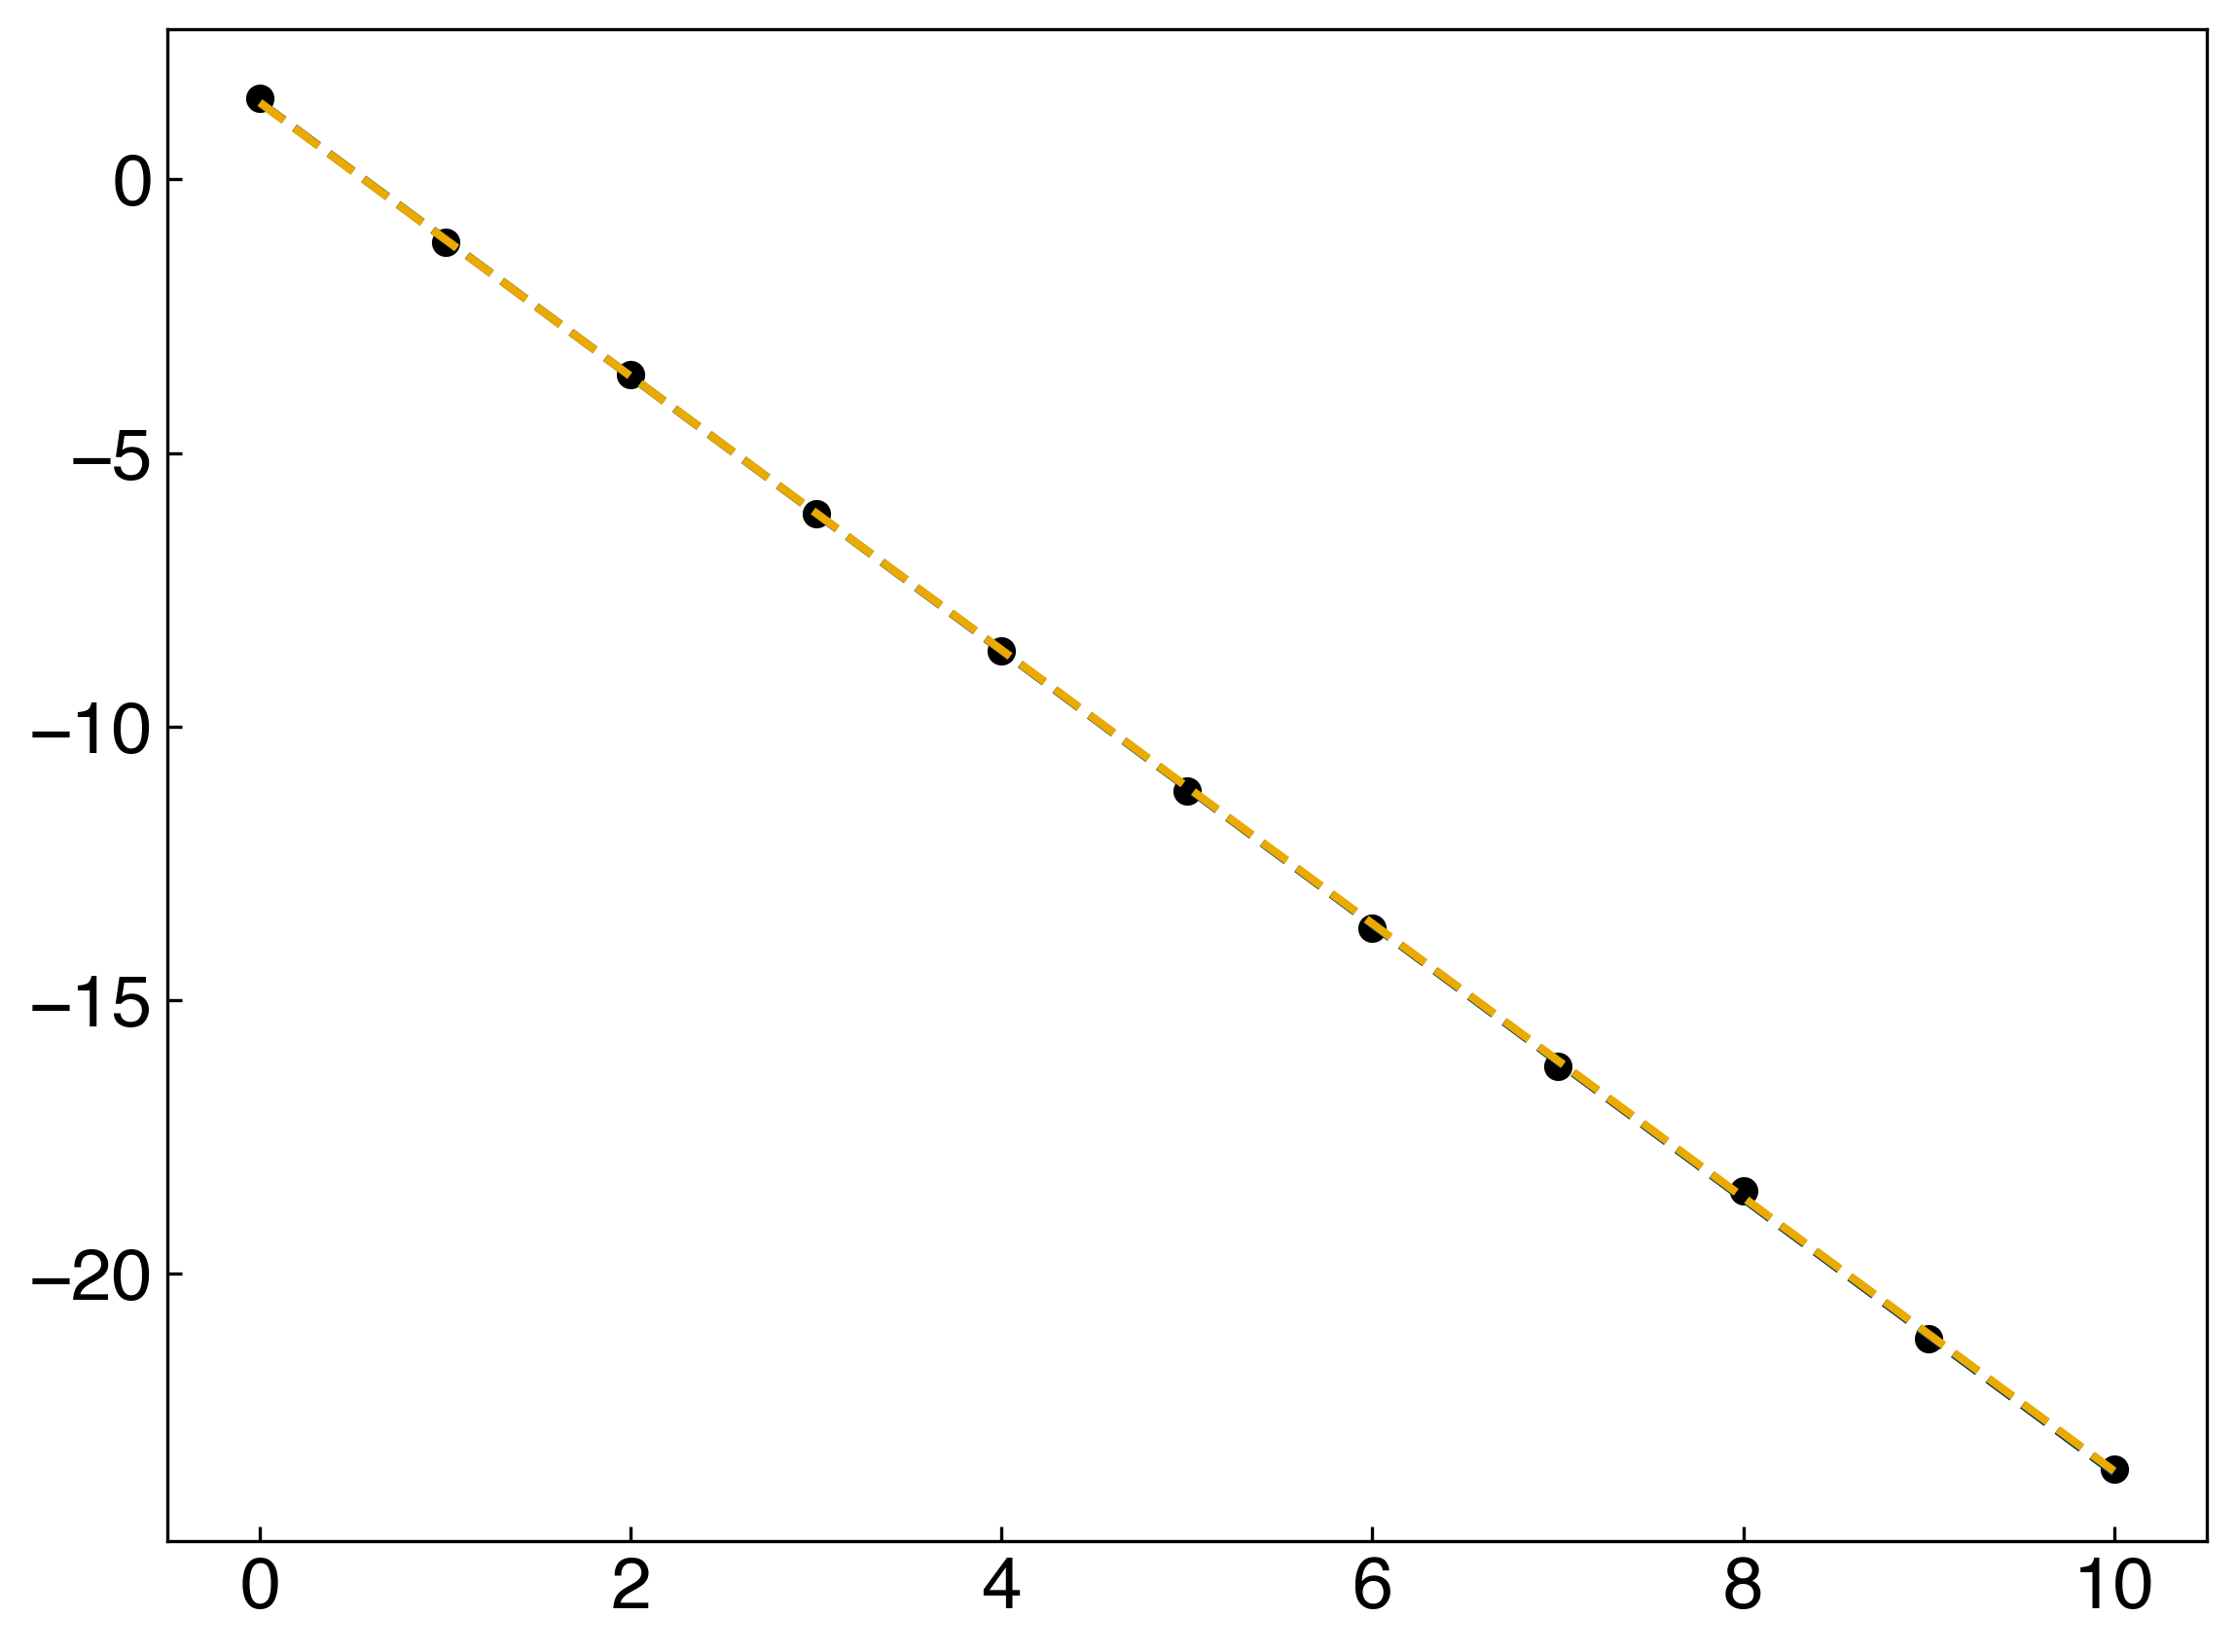

In [5]:
yhat = X@w_lsr

fig, ax = plt.subplots()
ax.plot(x, y, 'ok')
ax.plot(x, yhat, '--')
ax.plot(x, X@w, '--');

We can see that the best fit line actually "fits" the data better than the original weights! We will explore more strategies for quantifying the fit in the "regression" lecture.

## Polynomial Regression

If you have seen simple linear regression before, the derivation above probably seemed far more complex than what you have seen in the past. However, the advantage is that it is also much more general, as we will see when moving to polynomial regression.

In polynomial regression, we expand the model to be of the form:

$y_i = w_0 + w_1x_i + w_2x_i^2 + w_3x_i^3 ... + \epsilon_i$

As before, we can write this in summation notation:

$y_i = \sum_{j=0}^m w_j x_i^{\:j} + \epsilon_i$

where $m$ is the order of the highest polynomial. Recalling the definition of the Vandermonde matrix, we see that this can also be written as:

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

which is identical to the form that we used for linear regression. The only difference is that now the matrix $X$ has $m+1$ columns instead of 2 columns. This means that we can use the same solution from linear regression for polynomial regression!

$\bar{\bar{X}}^T\bar{\bar{X}}\vec{w} = \bar{\bar{X}}^T\vec{y}$

Let's see an example. First, we can generate some data:

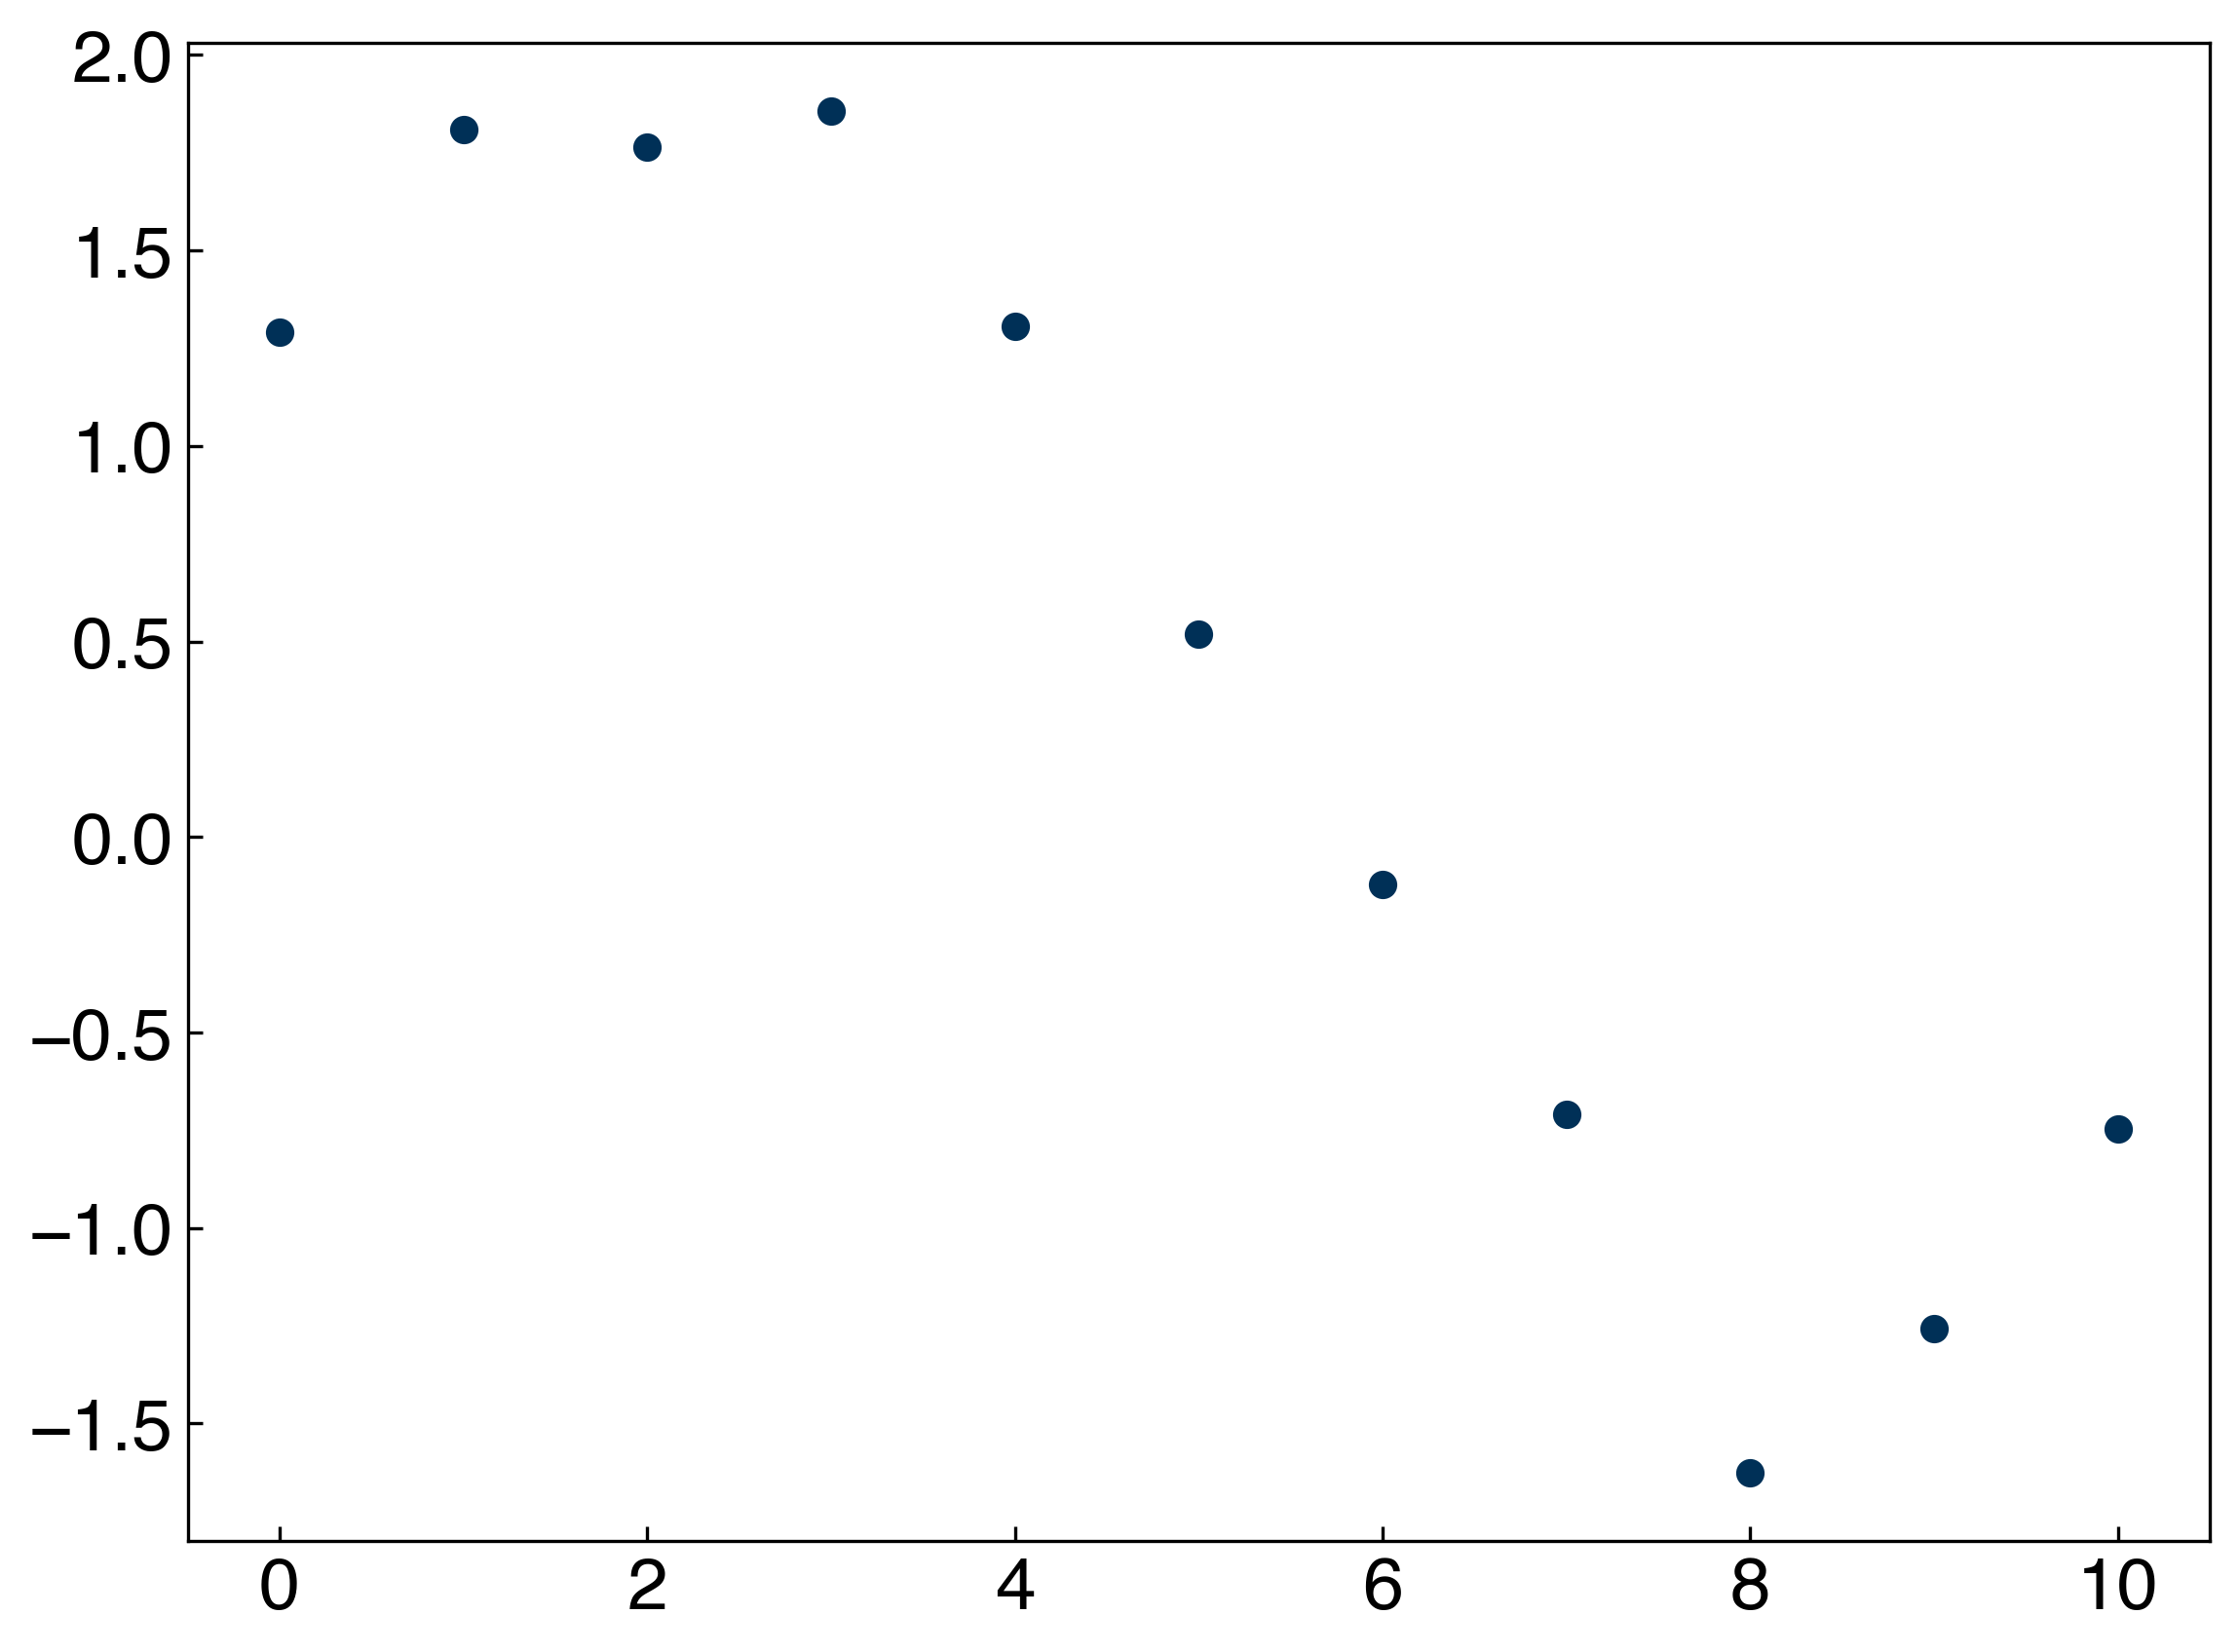

In [6]:
x = np.linspace(0,10,11)
x = x.reshape(-1, 1) #make x into a column vector
w = [1.4, 0.8, -0.3, 0.02]

X = np.hstack((x**0, x, x**2, x**3))
epsilon = normal(0, 0.2, len(x))
y = X@w + epsilon

fig, ax = plt.subplots()
ax.plot(x,y,'o');

Now we can try to recover the weights, $w$ using the same math as before:

In [7]:
A = X.T@X
b = X.T@y
w_lsr = np.linalg.solve(A,b)
print('Weights from least-squares regression: {}'.format(w_lsr))
print('Original weights to generate data: {}'.format(w))

Weights from least-squares regression: [ 1.17850064  1.00828158 -0.33630711  0.02153534]
Original weights to generate data: [1.4, 0.8, -0.3, 0.02]


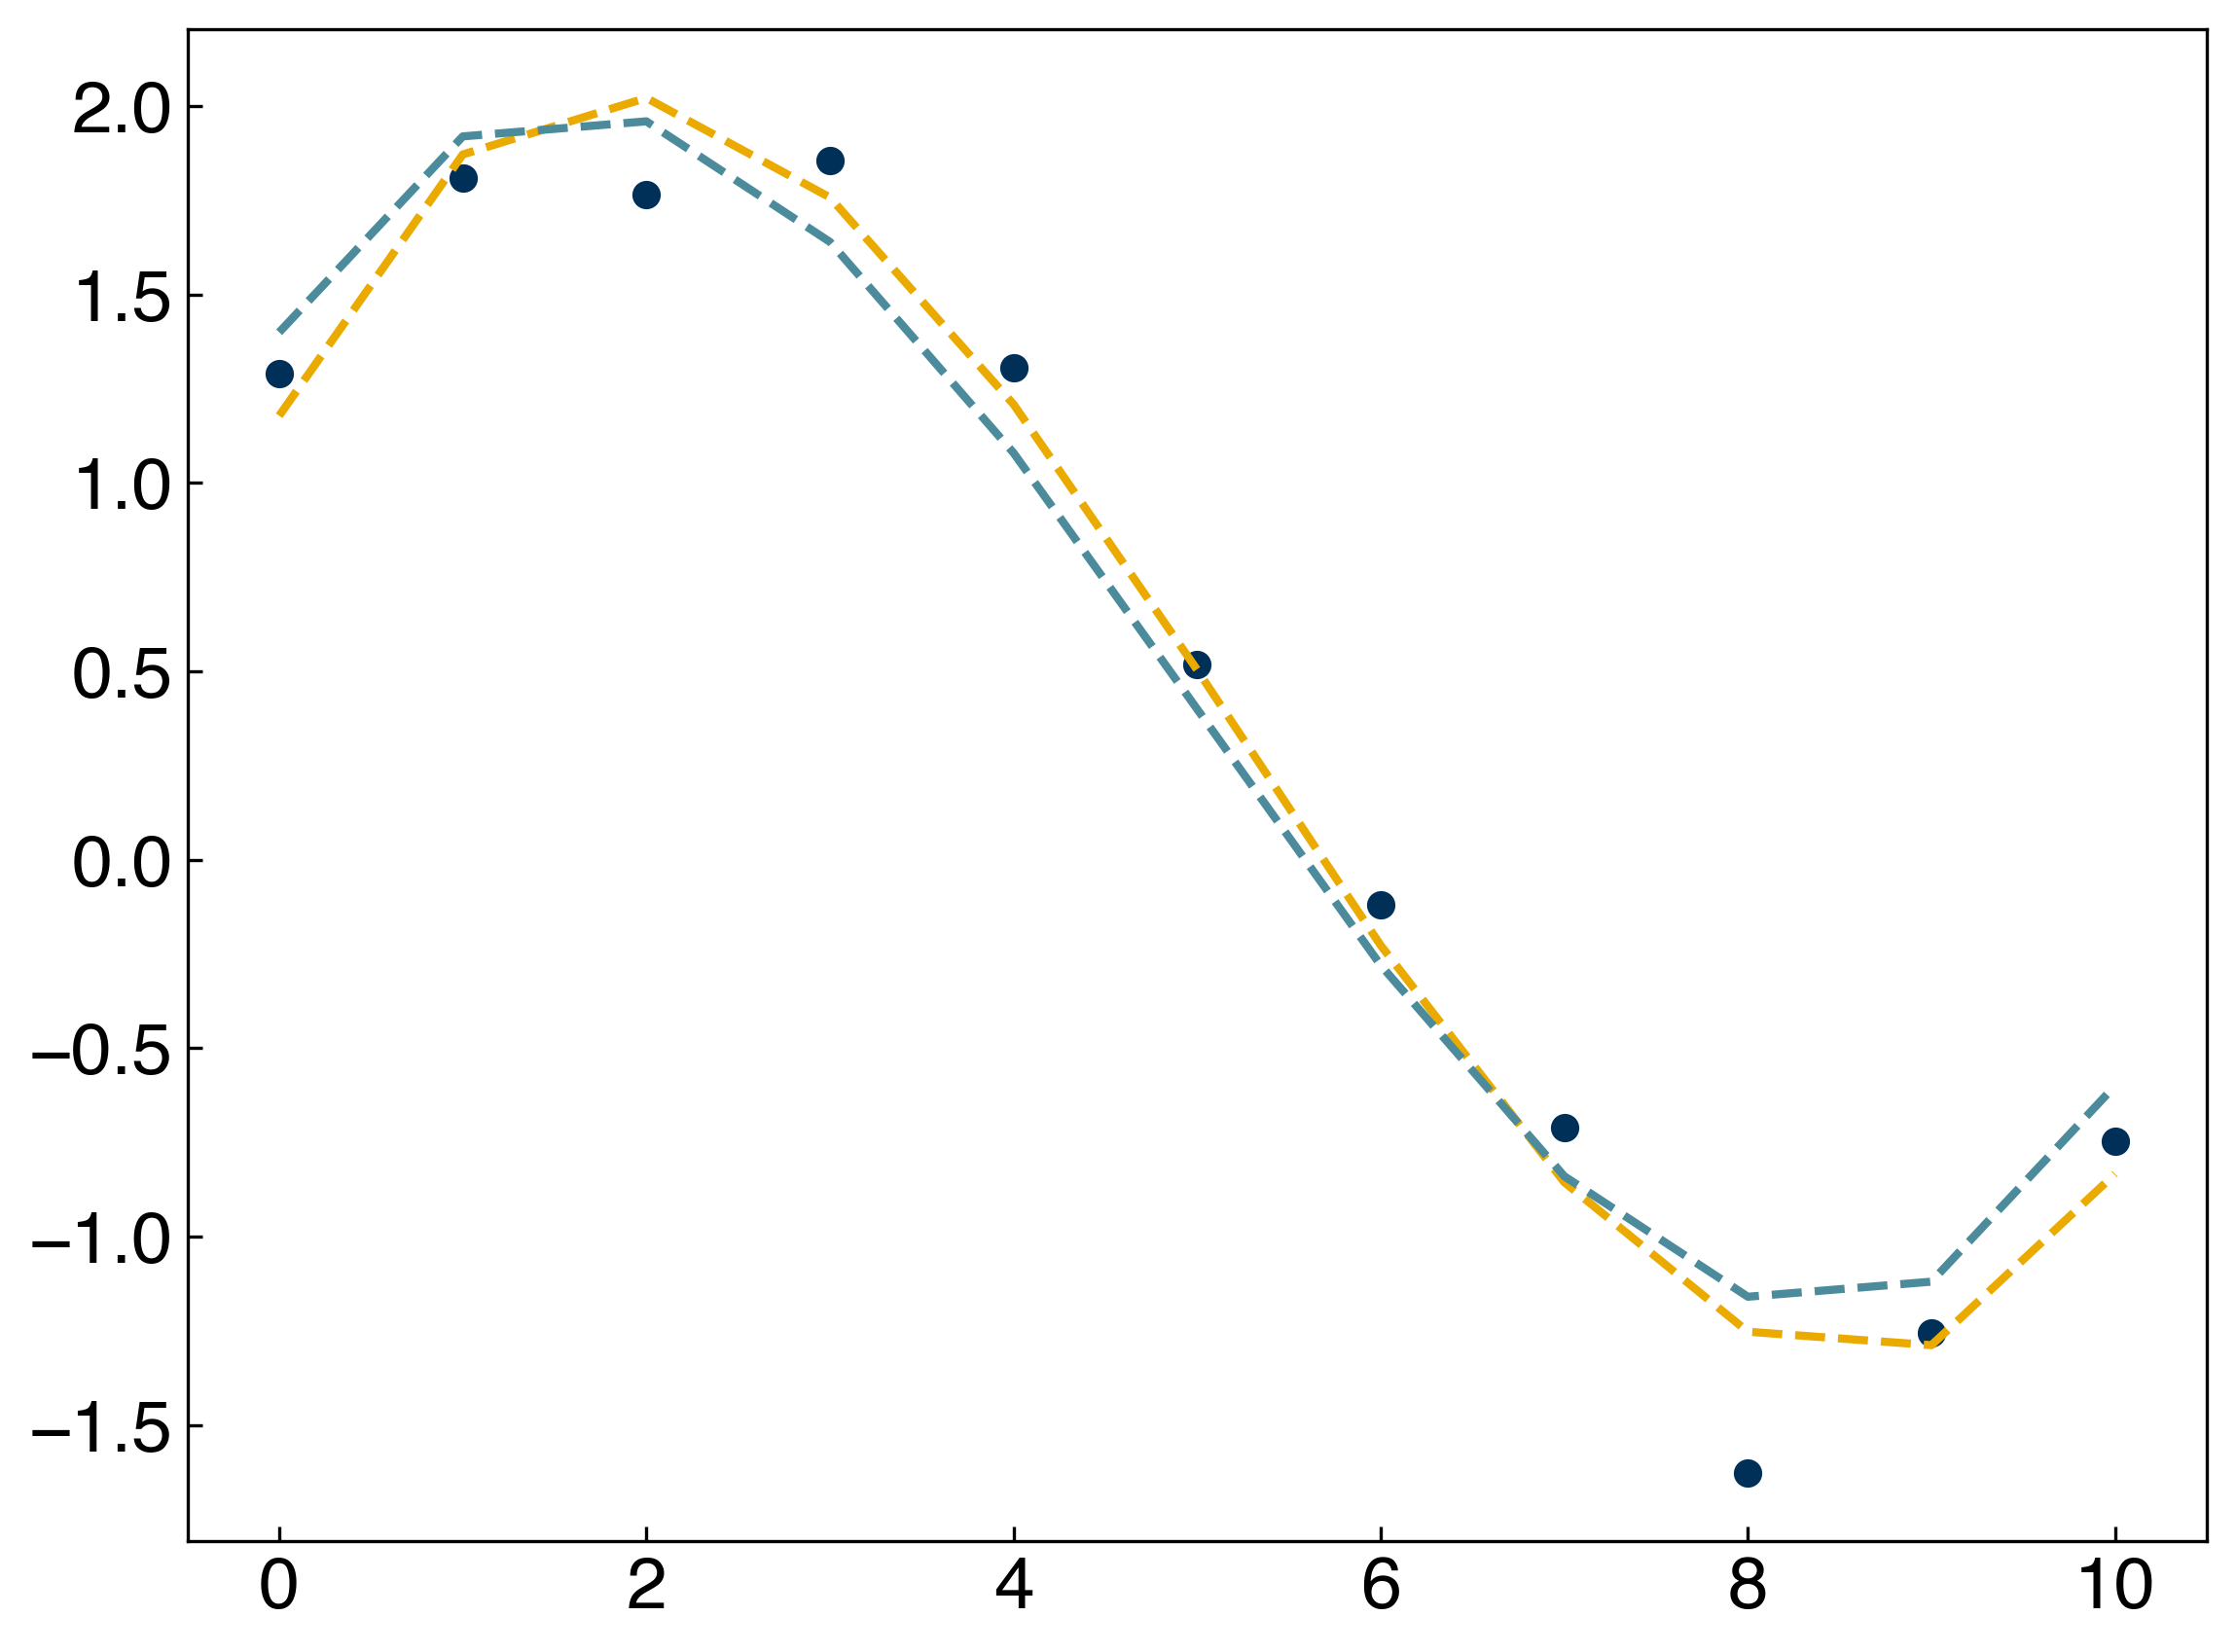

In [8]:
yhat = X@w_lsr

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x, yhat, '--')
ax.plot(x, X@w, '--');

In this case we cheated a bit, since we knew that the data was generated from a third-order polynomial. We can also find fits based on lower (or higher) orders of polynomials by modifying the order of the Vandermonde matrix used in the least-squares equation. First, we can make a function that creates a Vandermonde matrix of any order:

In [9]:
def vandermonde(x, order):
    cols = []
    for i in range(order):
        cols.append(x**i)
    return np.hstack(cols)

X_vdm = vandermonde(x,4)
X_vdm

array([[   1.,    0.,    0.,    0.],
       [   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

Now we can repeat the fitting procedure with different orders:

Weights: [ 1.29075276e+00  3.87894831e+00 -7.02576888e+00  5.34765033e+00
 -2.06823538e+00  4.39336417e-01 -5.20921500e-02  3.23332360e-03
 -8.17827447e-05]
Sum of Squared Errors (g): 0.005278708794674168


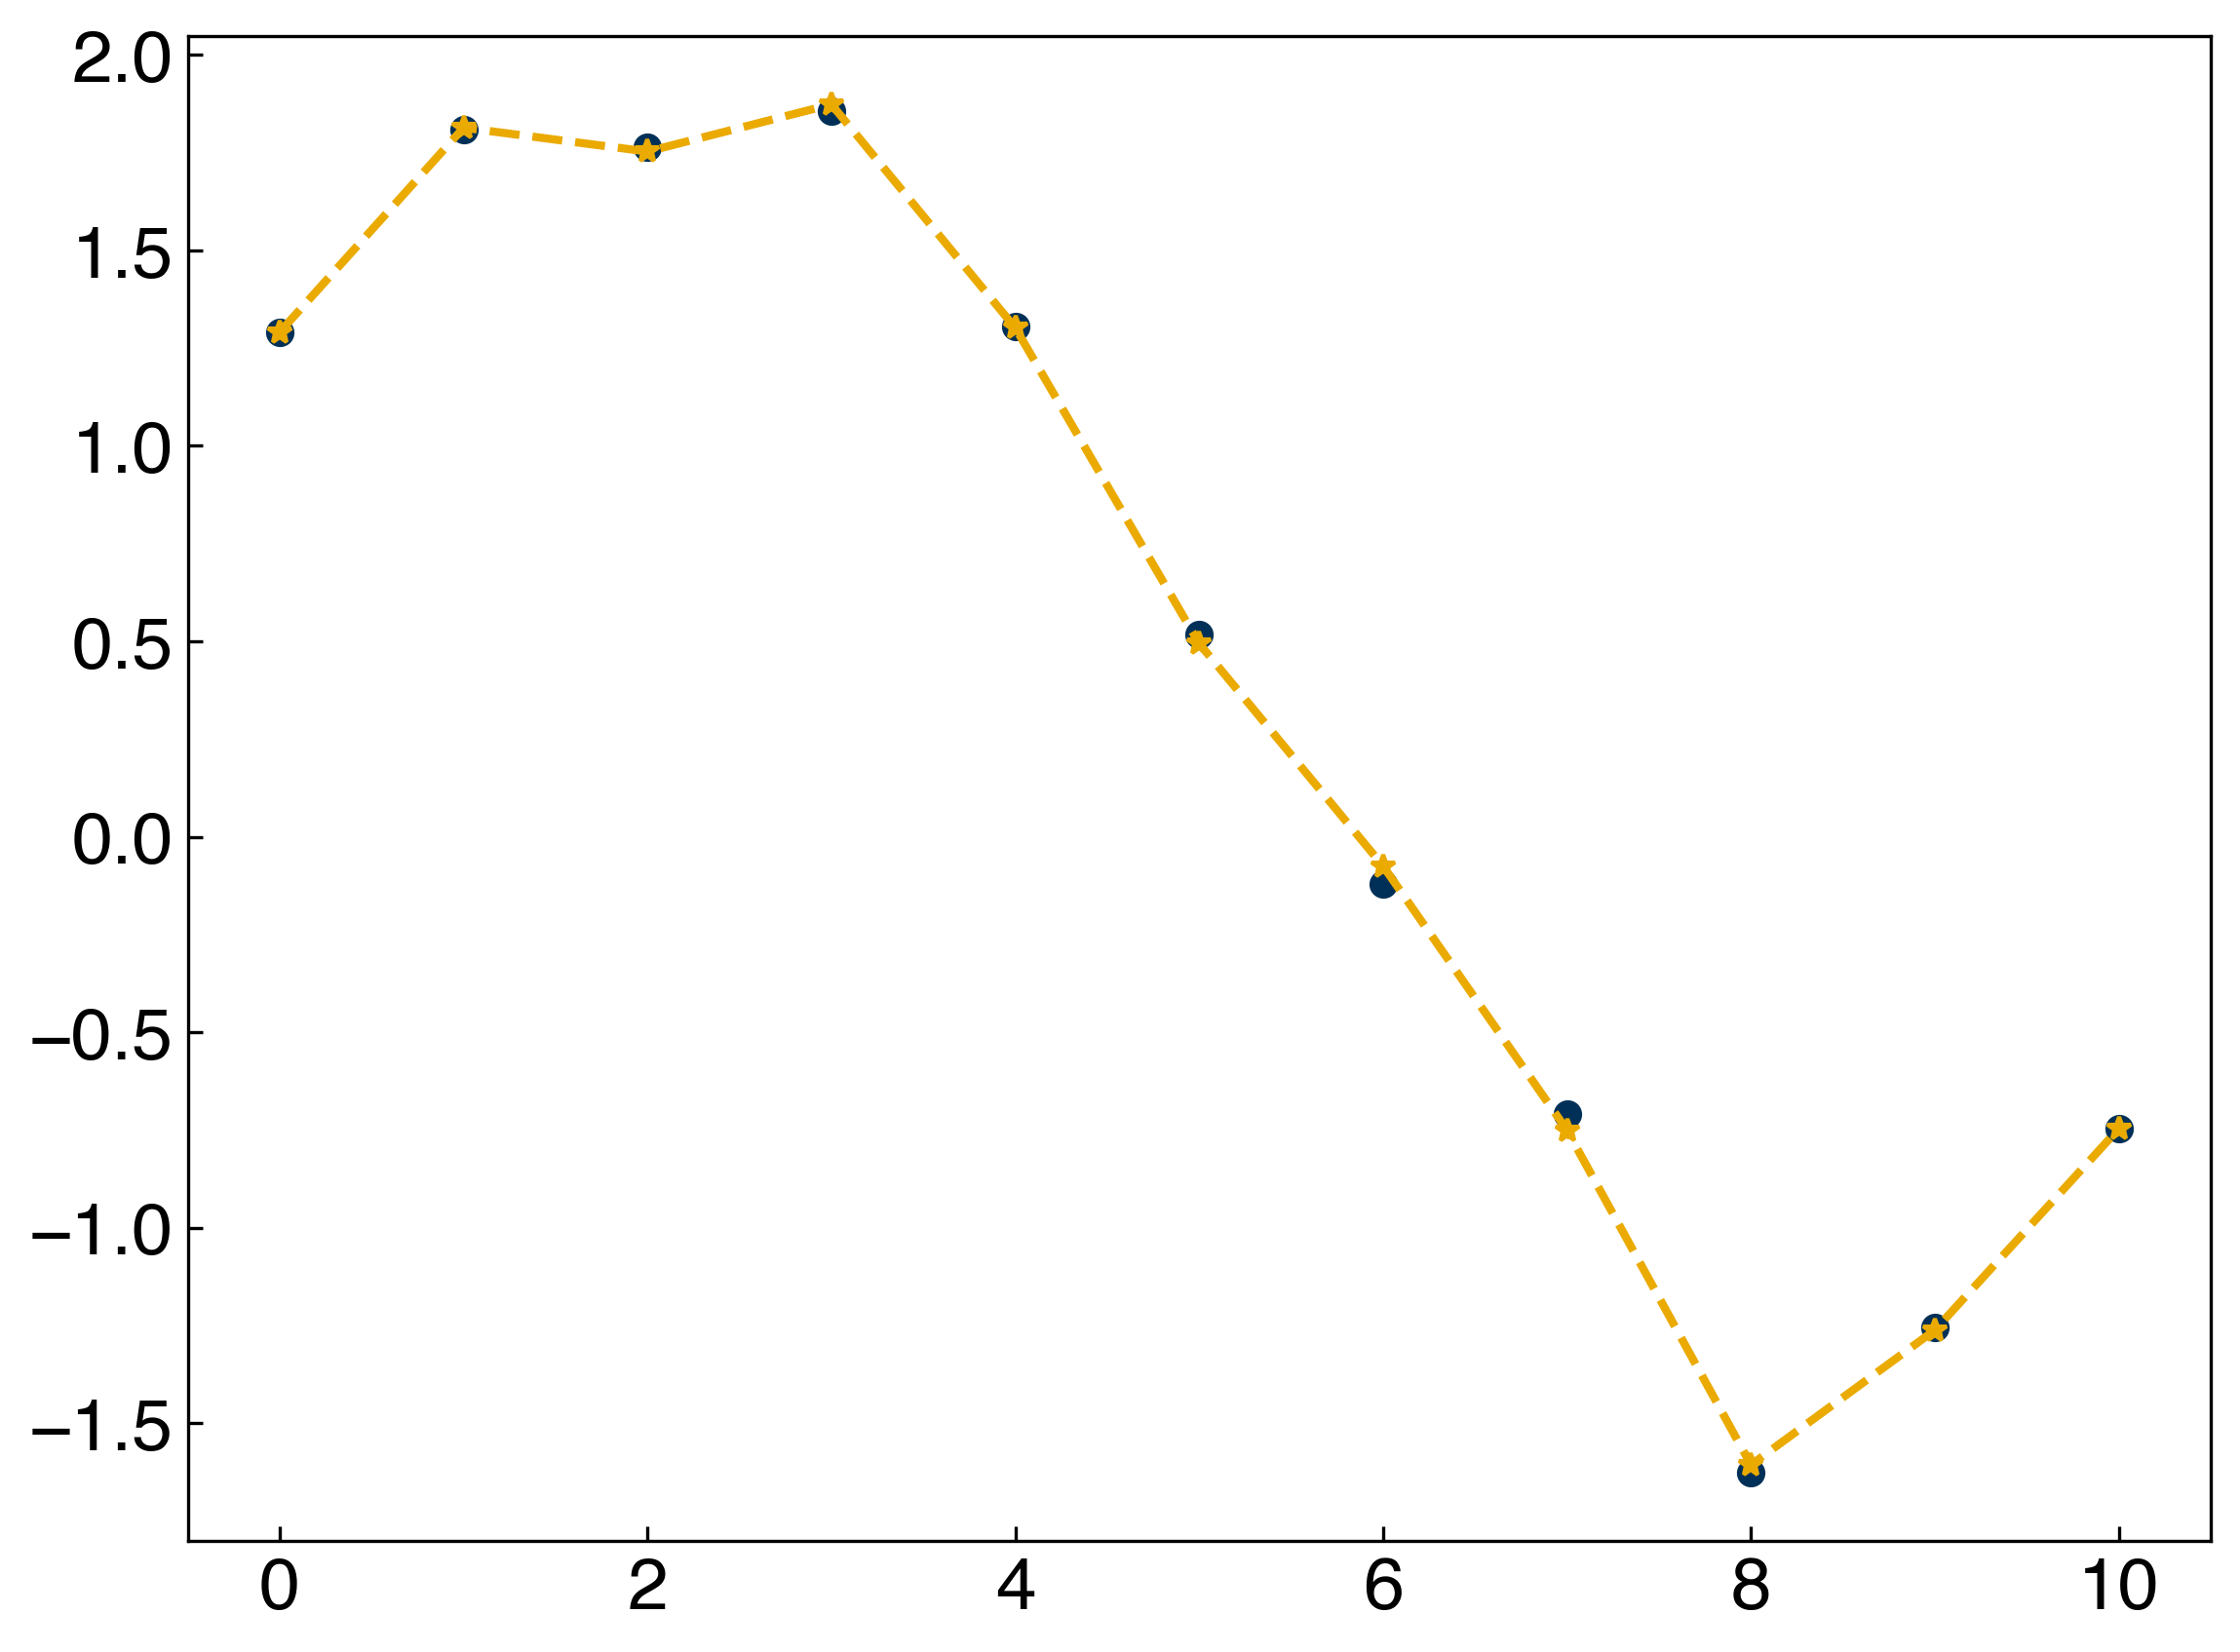

In [10]:
order = 9
X_vdm = vandermonde(x, order)
A = X_vdm.T@X_vdm
b = X_vdm.T@y
w_lsr = np.linalg.solve(A,b)

print('Weights: {}'.format(w_lsr))

yhat = X_vdm@w_lsr
SSE = sum((y - yhat)**2)
print('Sum of Squared Errors (g): {}'.format(SSE))

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x, yhat, '--*');

### Exercise: Compute the sum of squared errors ($g$) as a function of the order of the polynomial used to fit the data.

In [11]:
#sse = []
#orders = range(1,15)
#for order_i in orders:
#    X_vdm = vandermonde(x, order_i)
#    A = X_vdm.T@X_vdm
#    b = X_vdm.T@y
#    w_lsr = np.linalg.solve(A,b)
#    yhat = X_vdm@w_lsr
#    SSE = sum((y - yhat)**2)
#    sse.append(SSE)

#fig, ax = plt.subplots()
#ax.plot(orders, sse, '--or')

We see that as the order of the polynomial increases, the sum of squared errors decreases. However, we are only checking the behavior of our model at the points we use to train it. We can also use the model to interpolate between points or extrapolate to new points by creating a new Vandermonde matrix with more rows. Increasing the resolution adds rows within the original range, and results in interpolation, while increasing the range will result in extrapolation. Let's try both:

In [12]:
x_new = np.linspace(-1, 11, 100)
x_new = x_new.reshape(-1, 1) #create column vector
x_new.shape

(100, 1)

In [13]:
X_vdm_new = vandermonde(x_new, order)
X_vdm_new.shape

(100, 9)

We can create a new dataset based on this new higher resolution data:

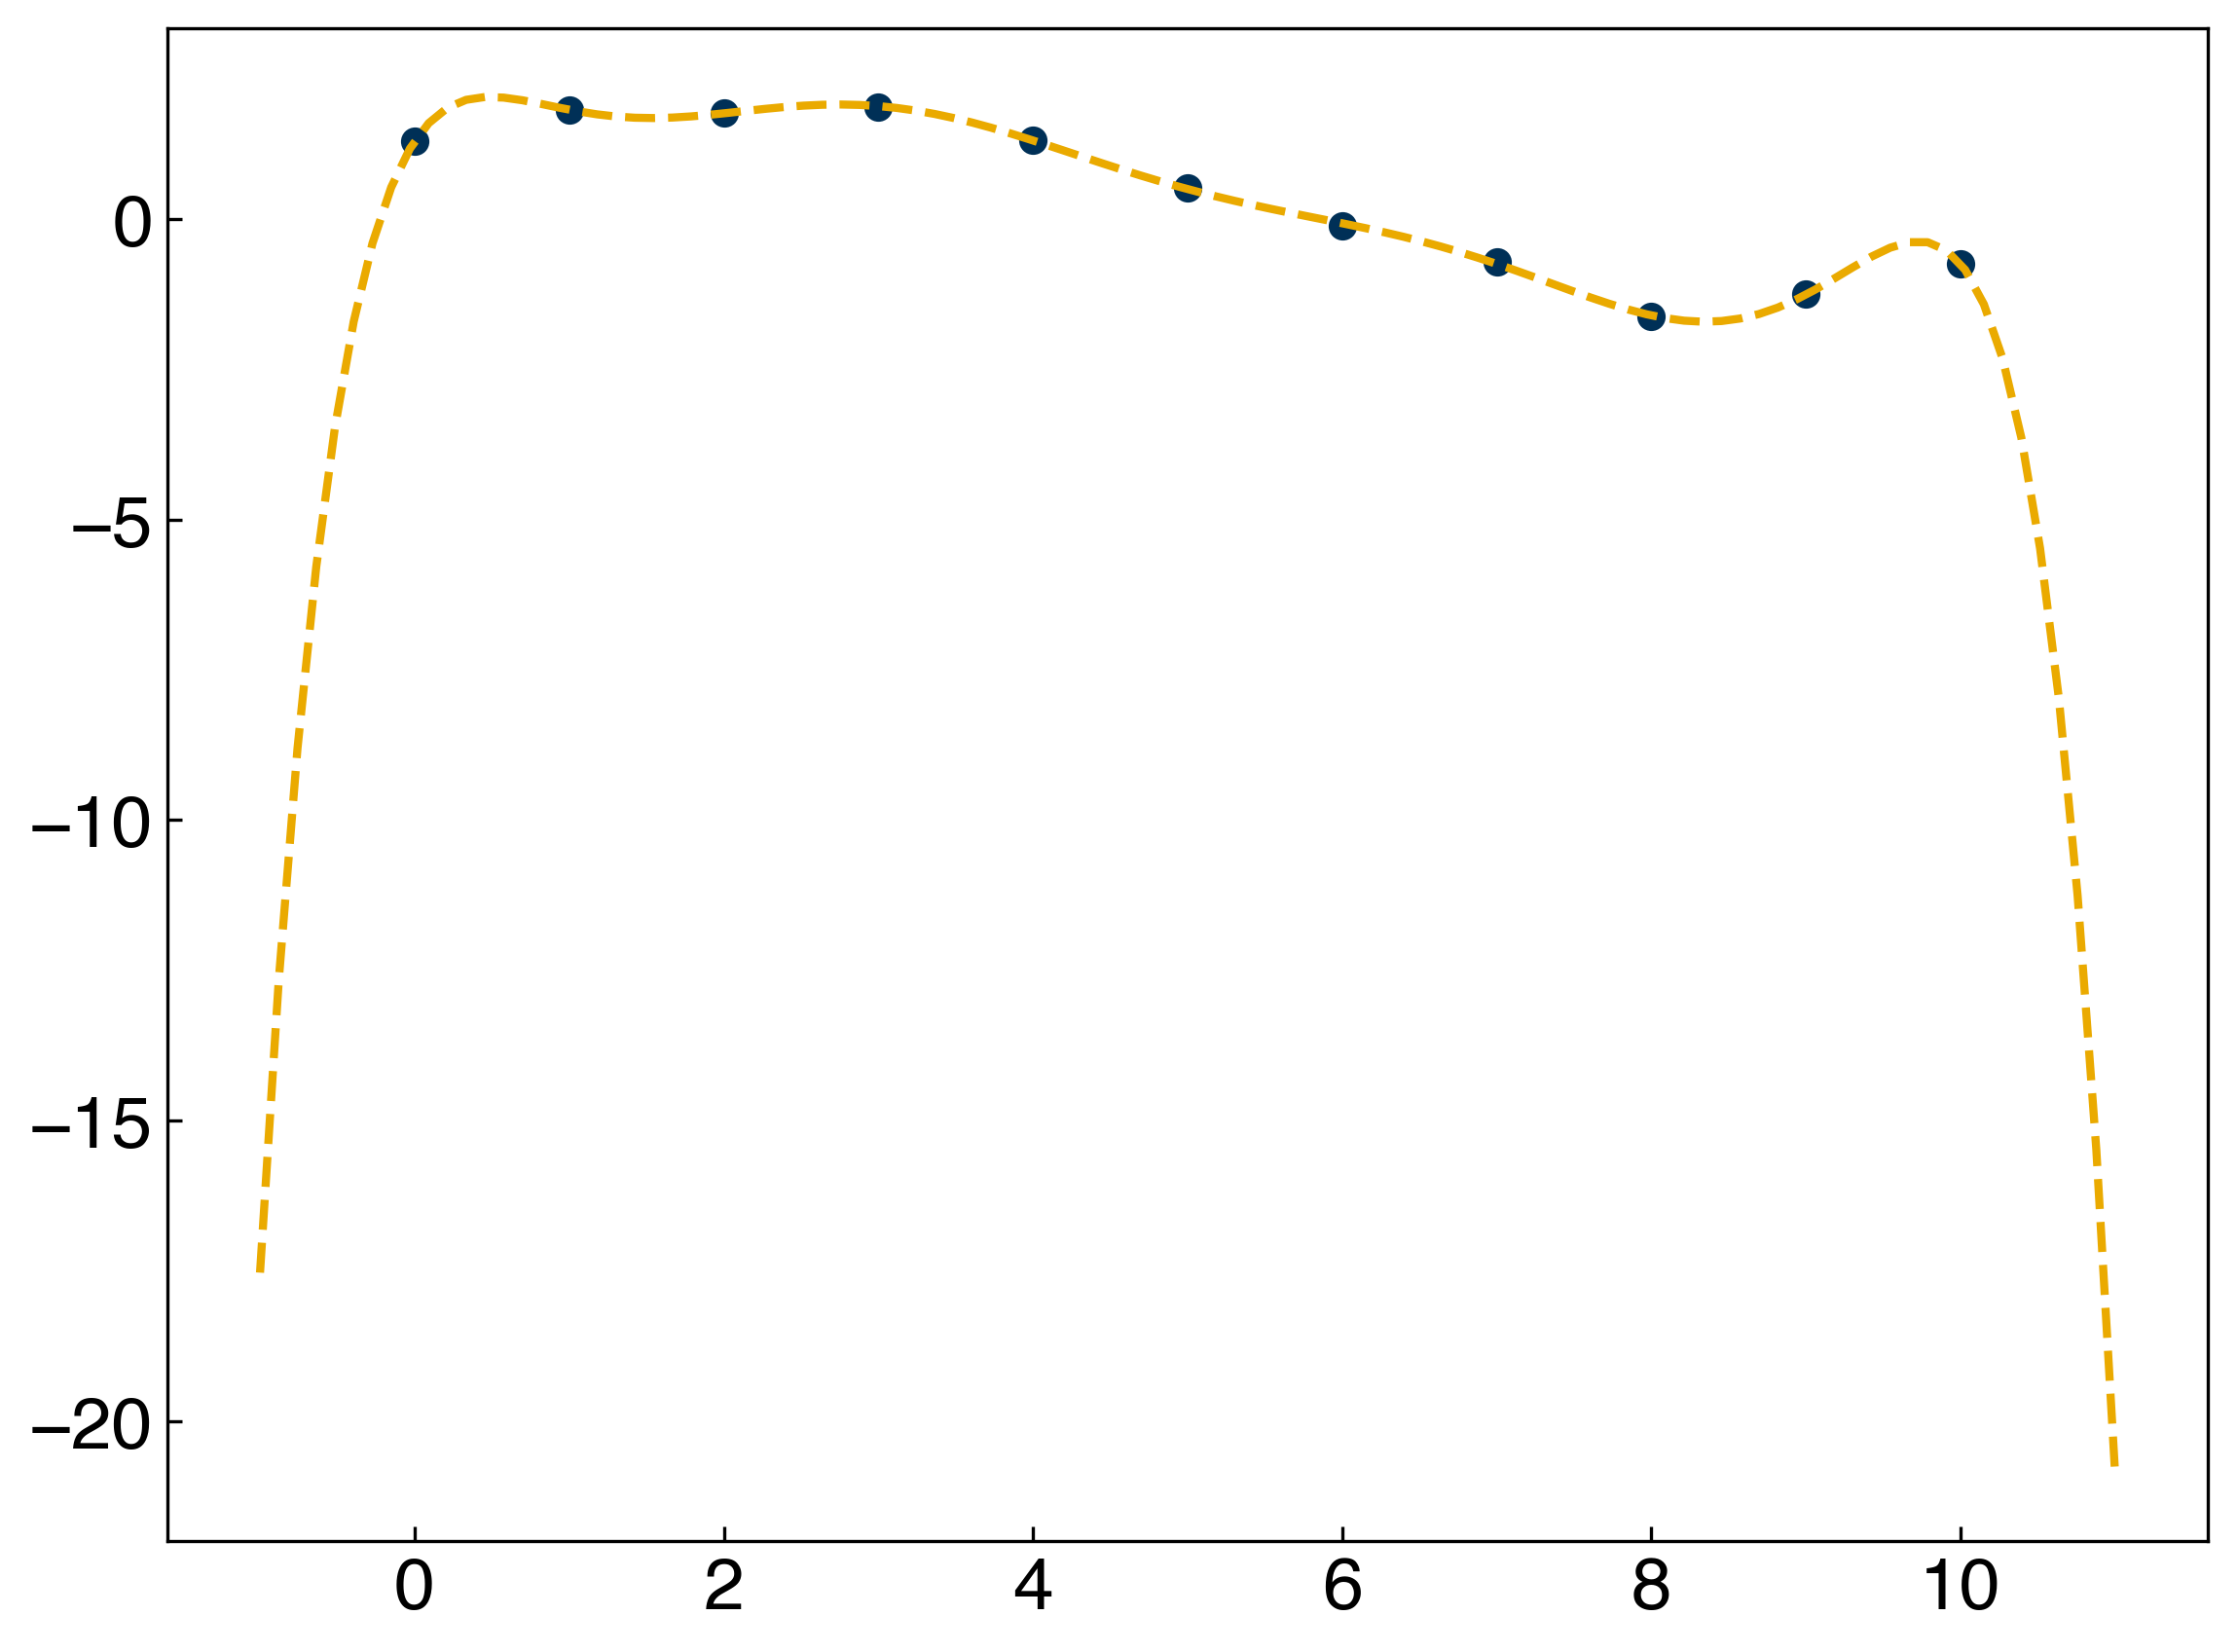

In [14]:
yhat_new = X_vdm_new@w_lsr

fig, ax = plt.subplots()
ax.plot(x, y, 'o')
ax.plot(x_new, yhat_new, '--');

### Discussion: What happens as the order is increased? Does the model always improve?

We will discuss more techniques for validating the model and assessing the best order of the polynomial in future lectures.

## General Linear Regression

We just saw that a model of the form: 

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

can be used for simple linear regression (if $\bar{\bar{X}}$ is a first-order Vandermonde matrix) or polynomial regression (if $\bar{\bar{X}}$ is a higher-order Vandermonde matrix). In fact, this form can be used for many different types of linear regression and is referred to as a **general linear model**. Note that this is different from a *generalized linear model*, where the error term is assumed to follow a distribution other than normal. This is very confusing, but not terribly relevant in practice.

The key concept is that the columns of $\bar{\bar{X}}$ can contain any type(s) of linearly-dependent non-linear functions and the math will remain the same:

$\bar{\bar{X}}^T\bar{\bar{X}}\vec{w^*} = \bar{\bar{X}}^T\vec{y}$

where $\vec{w^*}$ are the optimal least-squares parameters.

We will call the columns of $\bar{\bar{X}}$ the "basis functions" for general linear regression. One common technique is the use of Gaussians as the basis functions. We can demonstrate this with a more realistic dataset. We will load in a dataset from infrared spectroscopy of an ethanol molecule. The data was obtained [from NIST](https://webbook.nist.gov/cgi/cbook.cgi?ID=C64175&Units=SI&Type=IR-SPEC&Index=2#IR-SPEC), and we will use a new library called `pandas` to read it in. You will learn more about this in the "Data Management" module, but for now you just need to run the cell below:

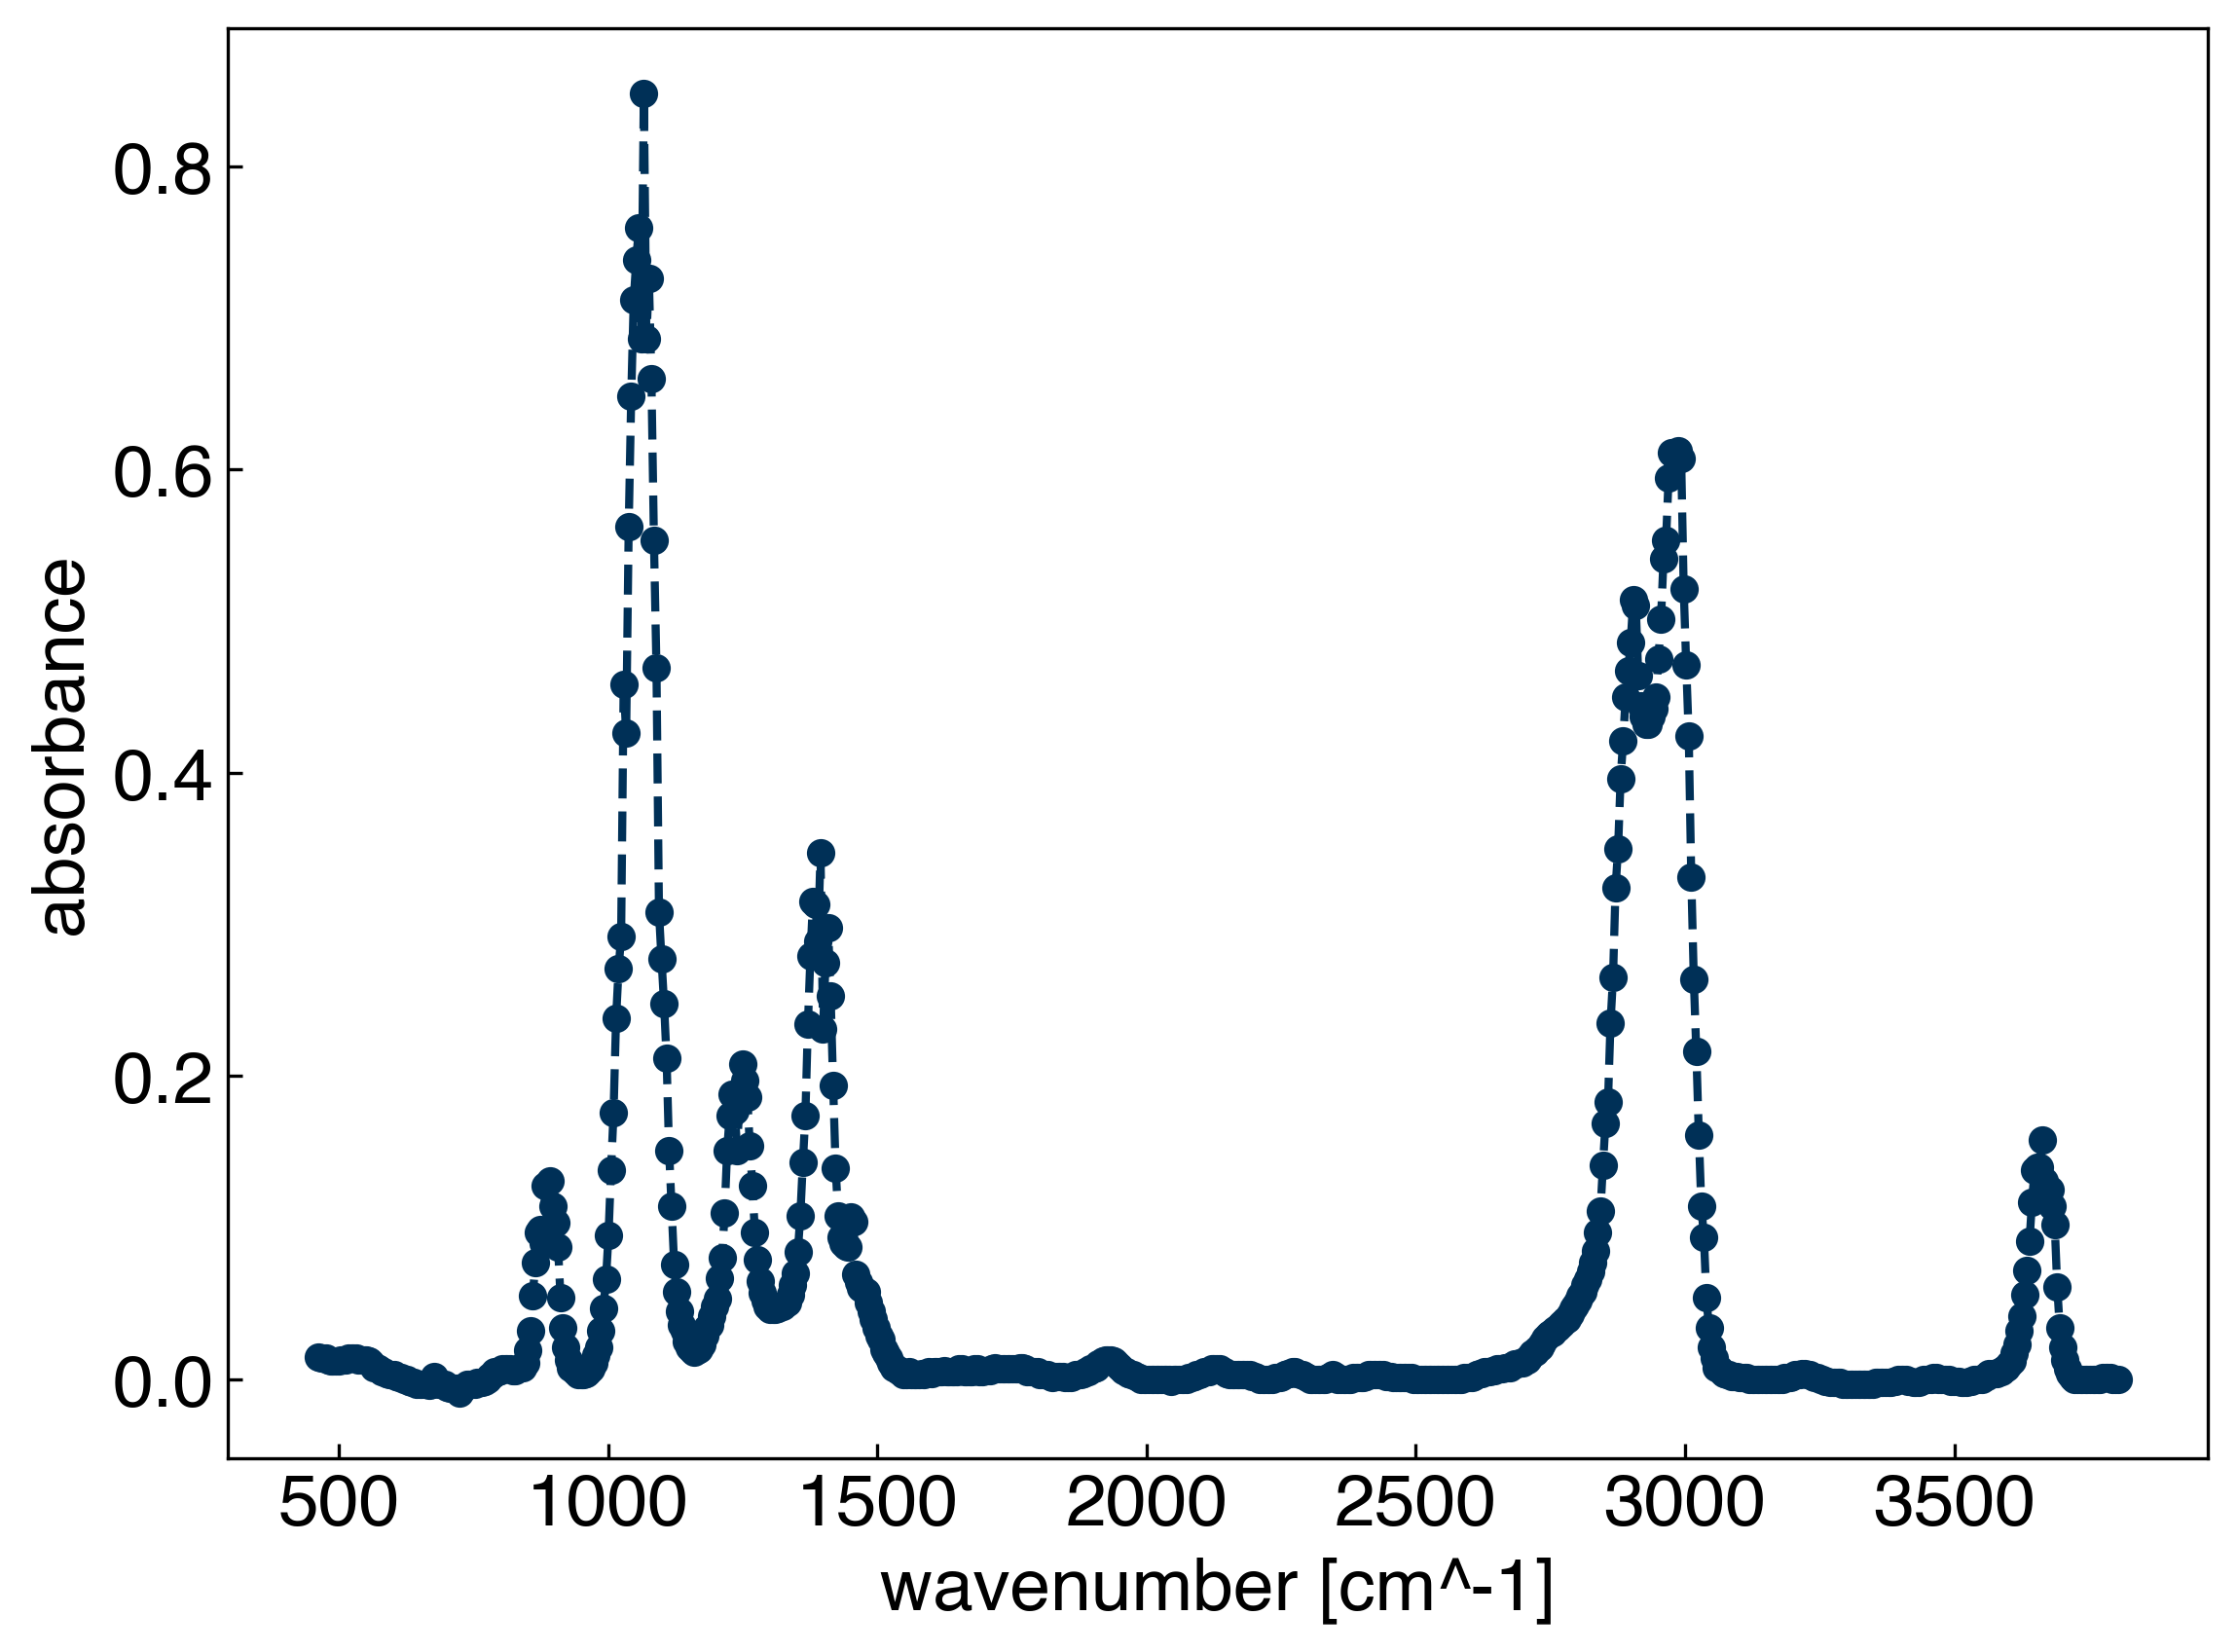

In [15]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('data/ethanol_IR.csv')
x_all = df['wavenumber [cm^-1]'].values
y_all = df['absorbance'].values

fig, ax = plt.subplots()
ax.plot(x_all,y_all)
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

This data looks a lot more complicated than our toy dataset from before. You don't need to understand the details of chemistry or infrared spectroscopy for this exercise. The key to analyzing these spectra is recognizing that the size and position of the peaks tells us information about the nature of the molecule. Let's make things easier by just selecting one of the peaks:

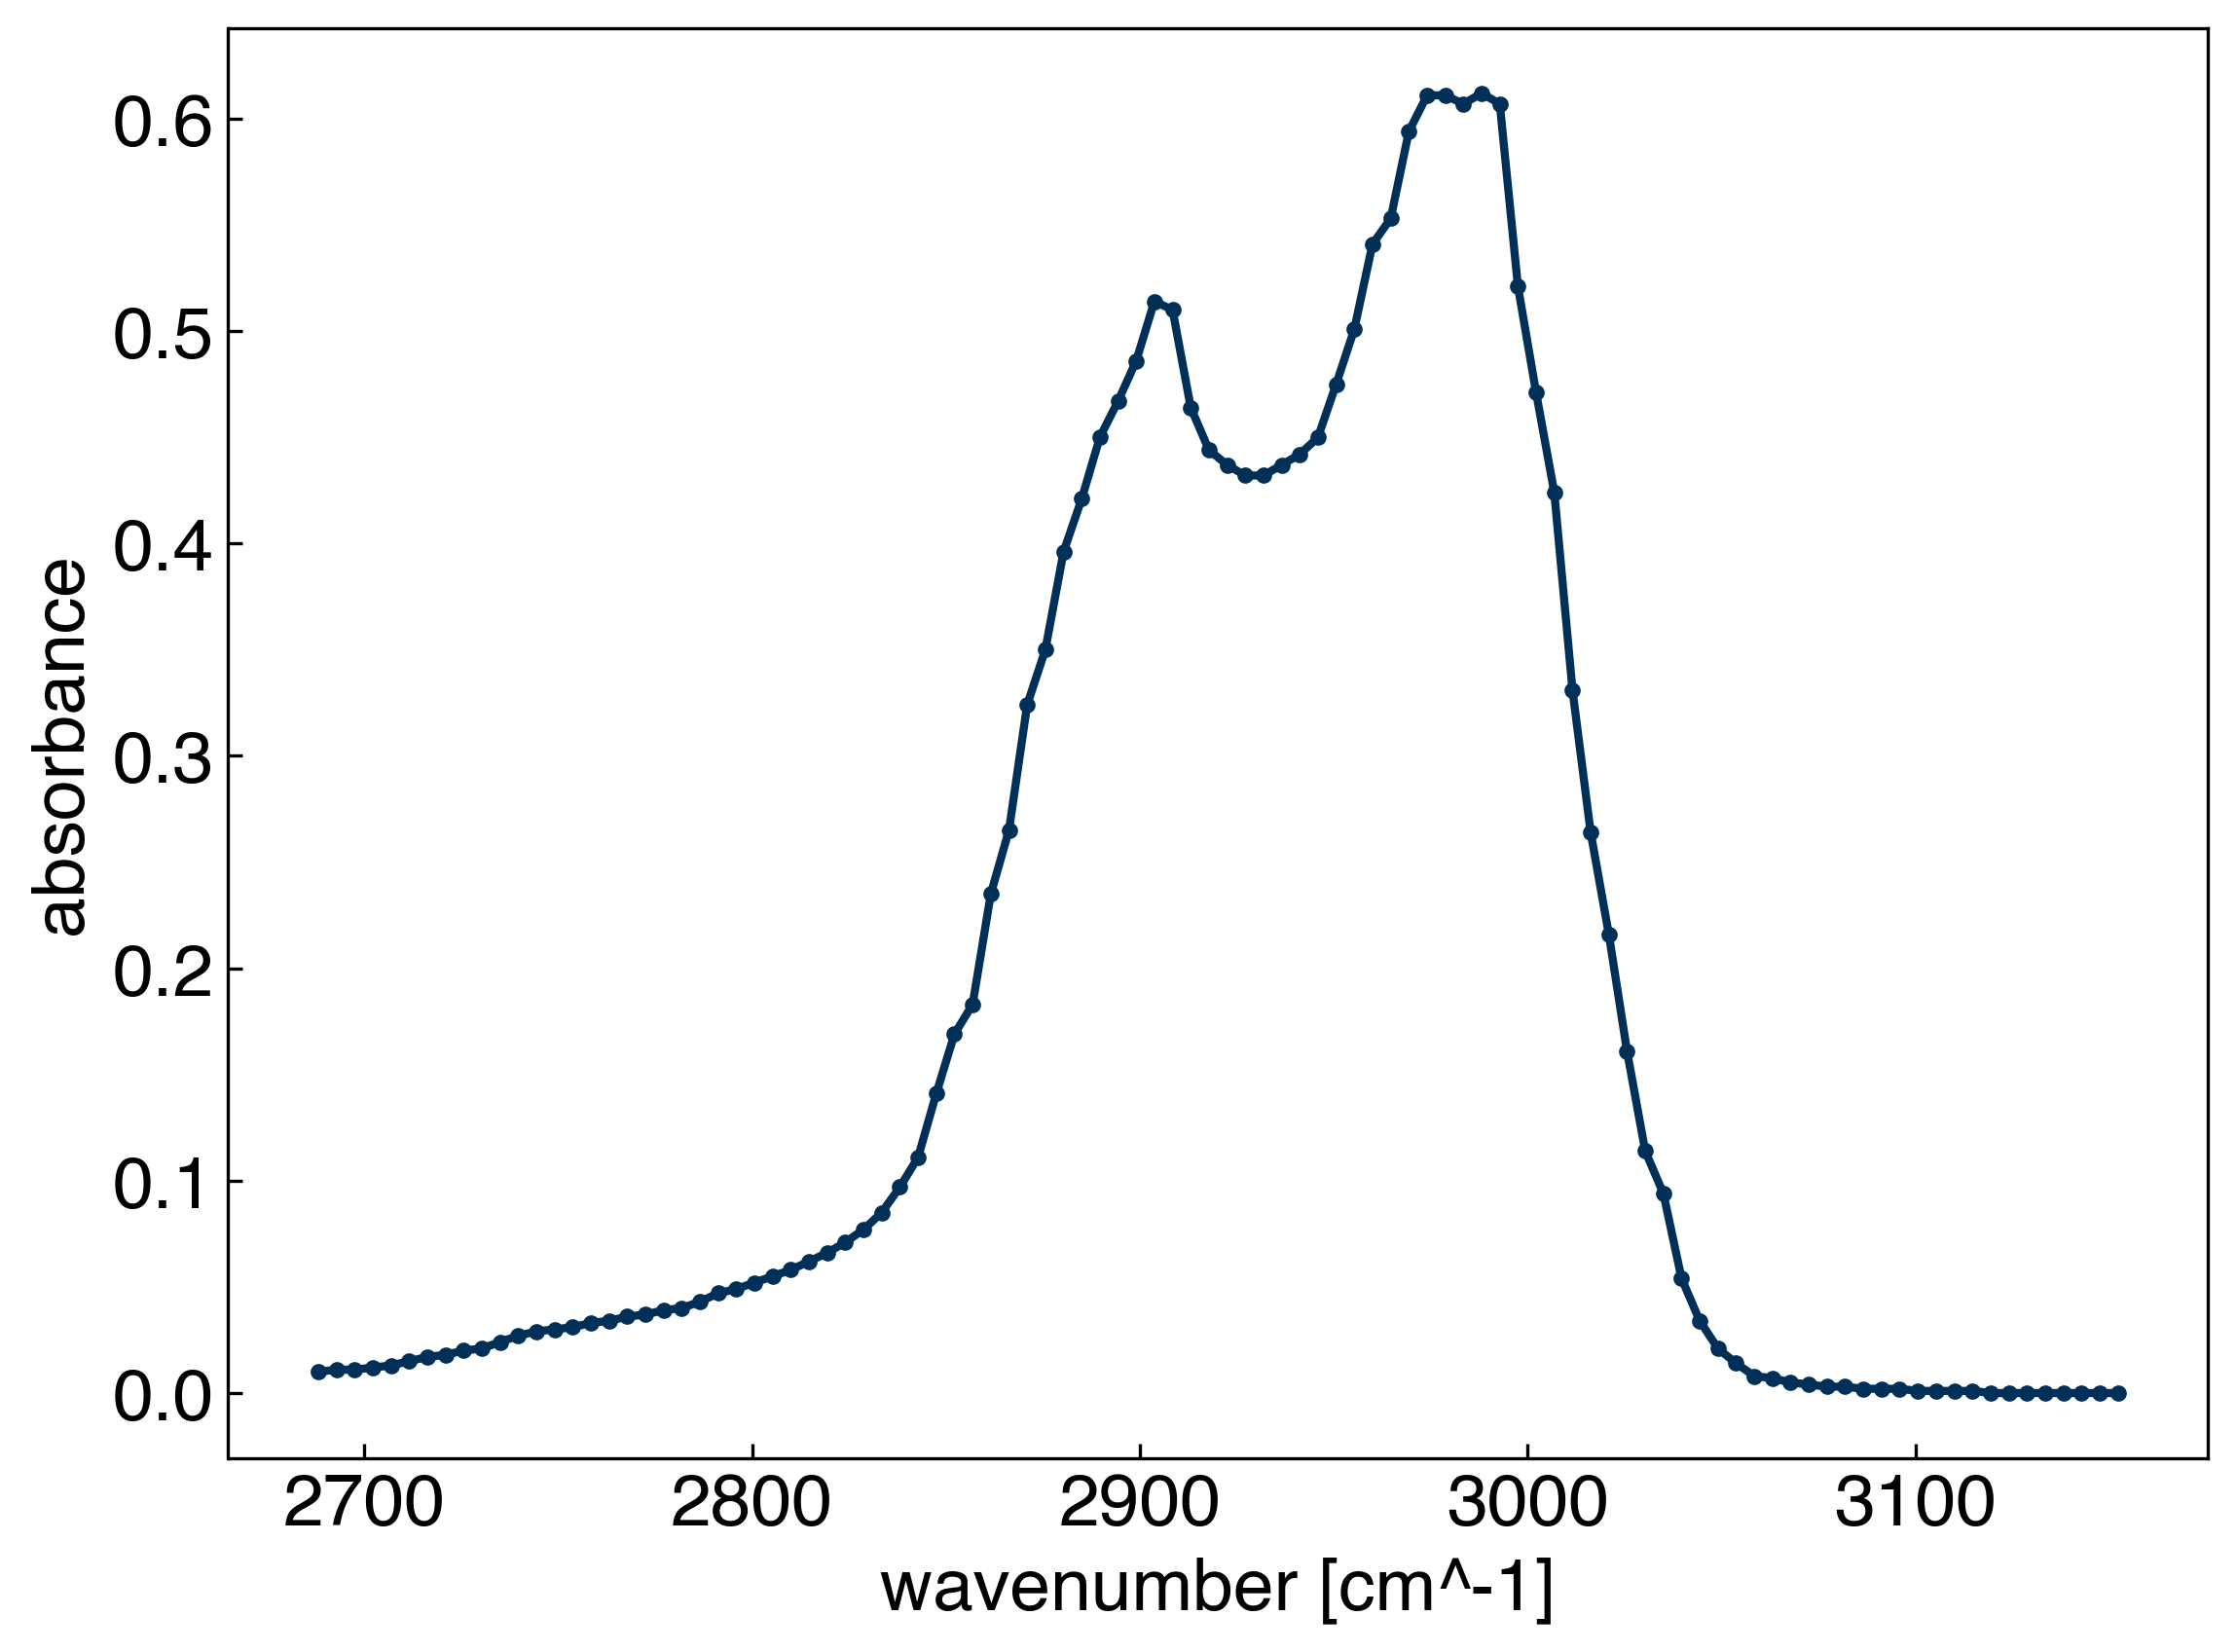

In [16]:
x_peak = x_all[475:575]
y_peak = y_all[475:575]

fig, ax = plt.subplots()
ax.plot(x_peak,y_peak, '-', marker='.')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

Let's see what happens if we try to fit this with the polynomials from before:

Weights: [ 7.03107204e+04 -2.48441196e+00 -4.67031587e-02  4.72309134e-06
  8.17065392e-09 -5.82965454e-13  2.20483928e-17 -2.18438231e-19
 -2.31557743e-23 -1.38025477e-27 -4.33126419e-30  4.72375168e-33
  9.03665065e-37 -3.92292263e-41 -1.60712746e-43 -4.06640311e-47
  1.62313438e-50 -3.49613454e-55  5.63975509e-58 -1.44629384e-61]
Sum of Squared Errors: 0.29843275865015


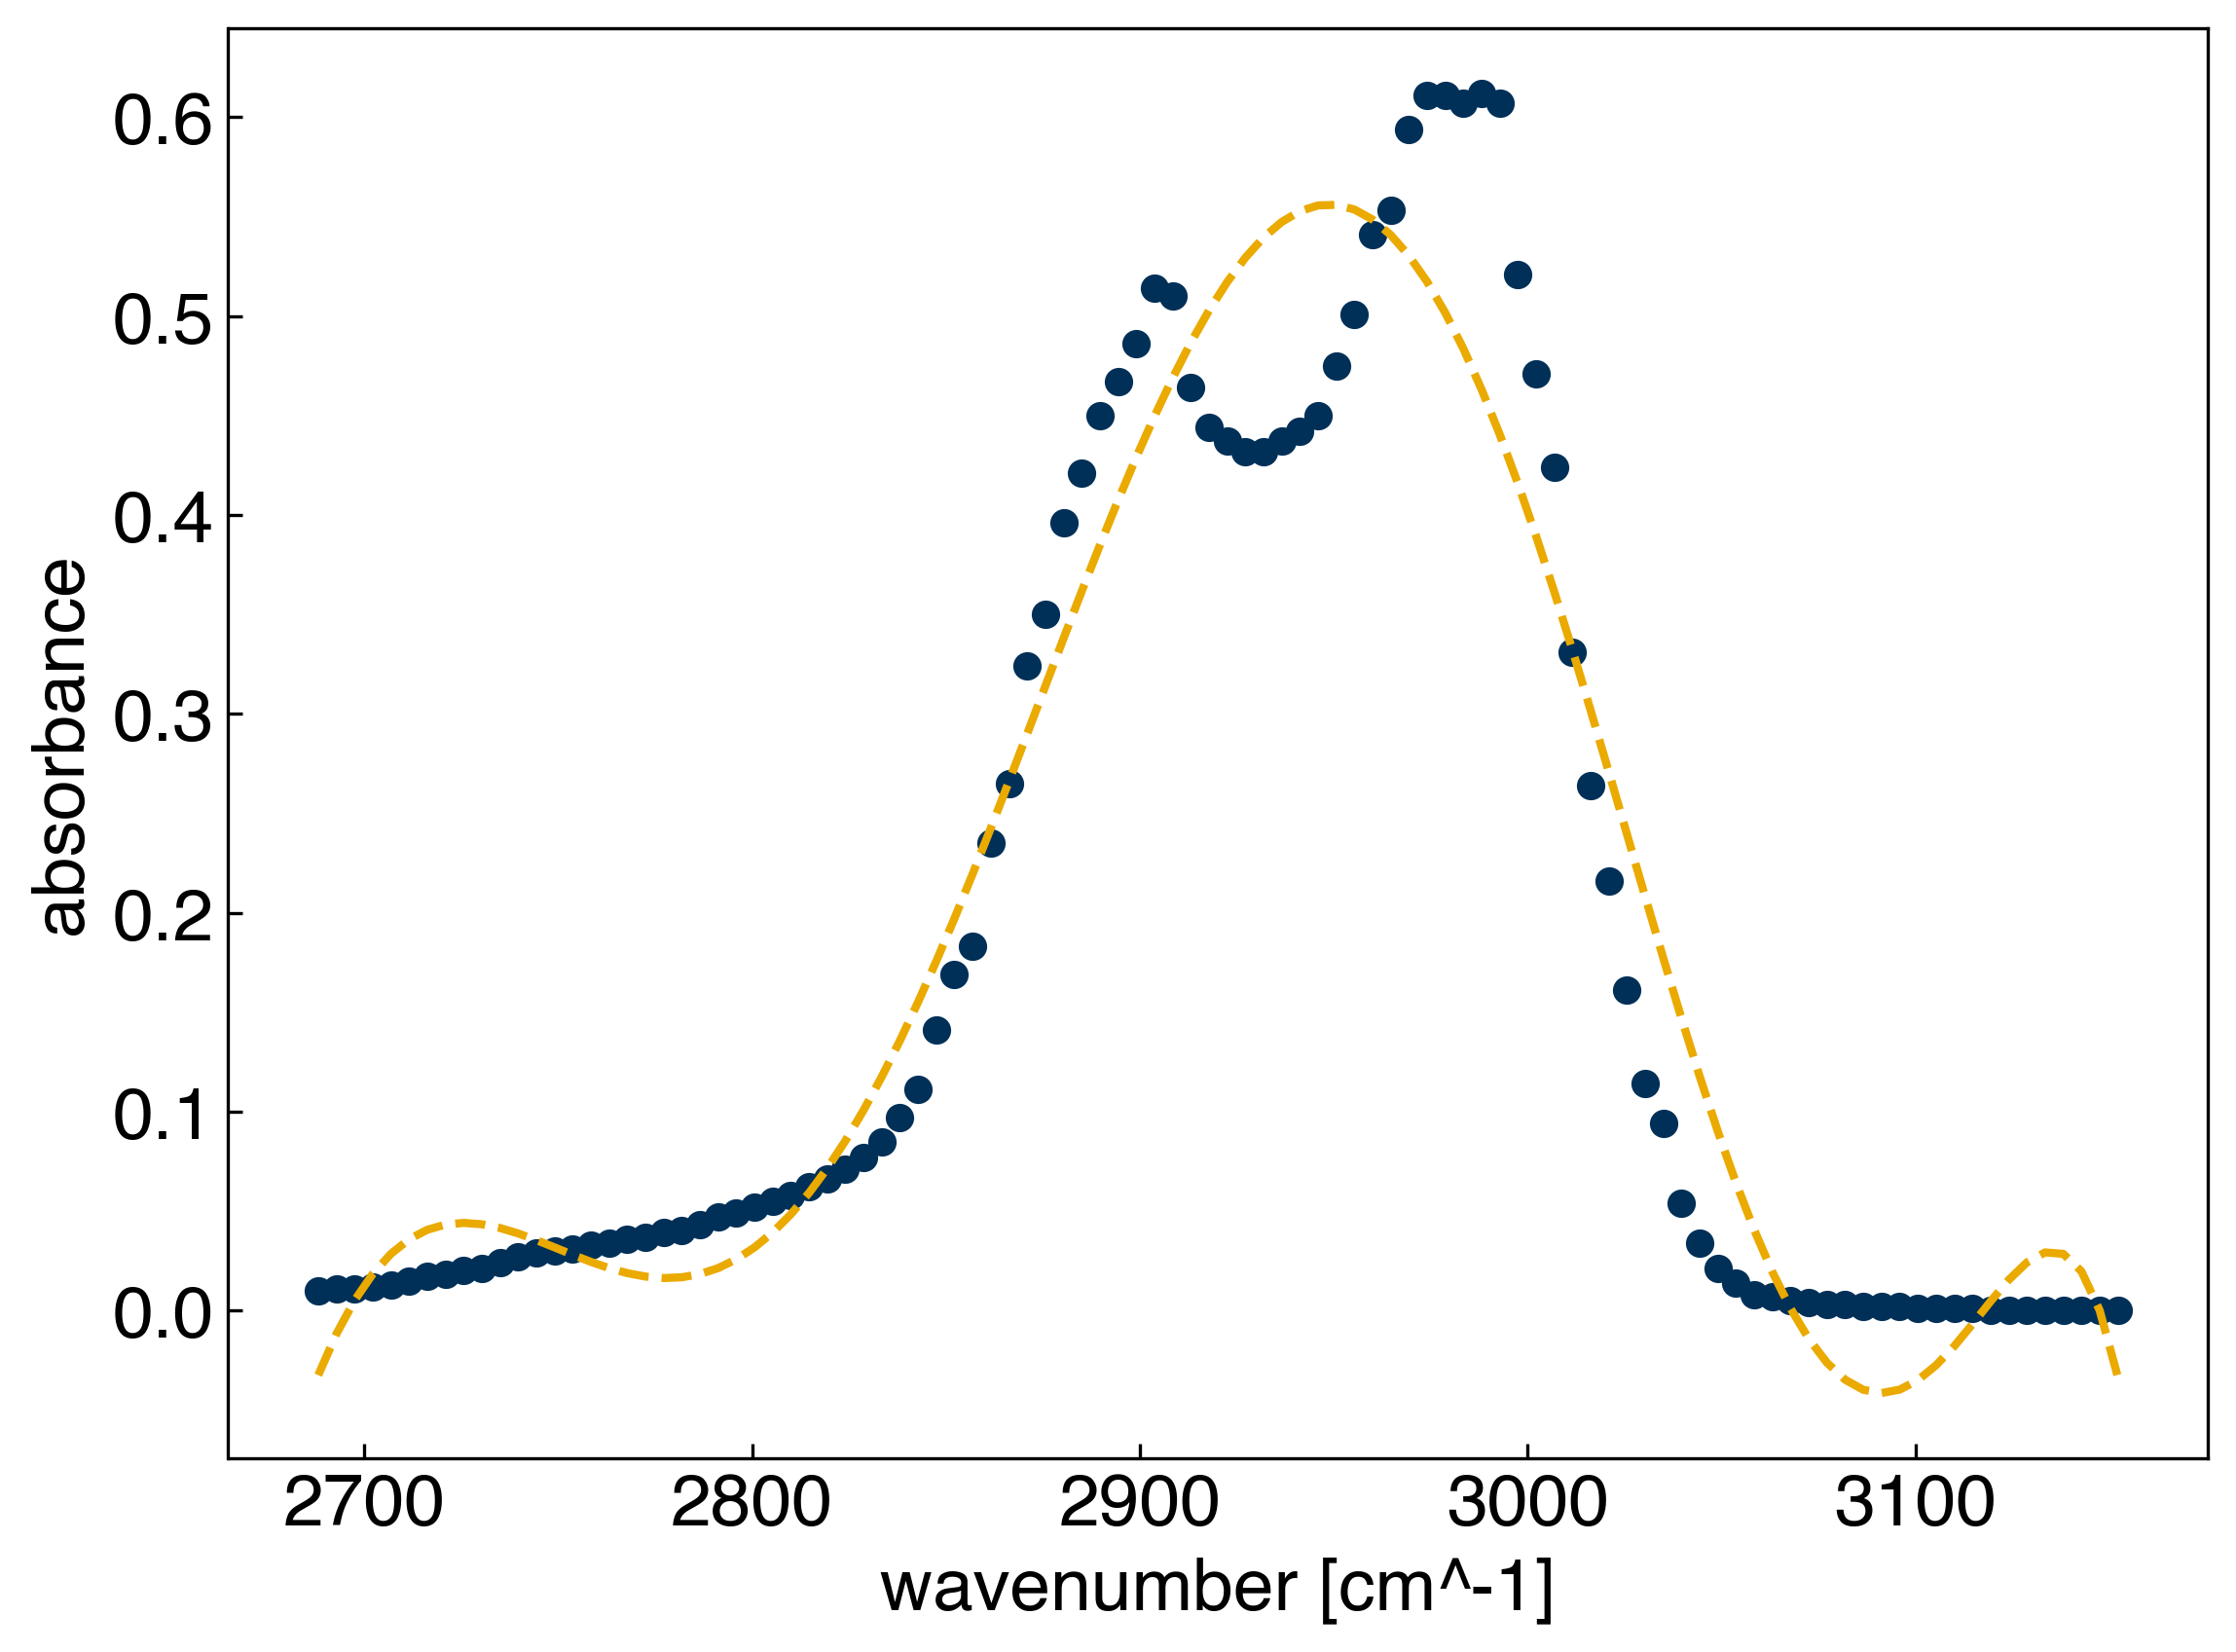

In [17]:
m = 20

x_peak = x_peak.reshape(-1, 1) #create a column vector
X_vdm = vandermonde(x_peak, m) #generate Vandermonde matrix
b_m = np.dot(X_vdm.T, y_peak) #generate b vector with new features
A_m = np.dot(X_vdm.T, X_vdm) #generate A matrix with new features
w_m = np.linalg.solve(A_m, b_m) #solve Ax=b with new features
print('Weights: {}'.format(w_m))

yhat_m = np.dot(X_vdm, w_m) #compute predictions
SSE_m = np.sum((y_peak - yhat_m)**2) #compute sum of squared errors
print('Sum of Squared Errors: {}'.format(SSE_m))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat_m, '--')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

Even if we add a lot of polynomials, the fit does not look very good. We never seem to capture the two peaks. Instead of polynomials we can see that the two peaks in the spectra look like the Gaussian distributions:

$N(x, \mu, \sigma) = \frac{1}{2\pi\sigma^2}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$

We can use Gaussian functions, instead of polynomials, to construct our model:

$y_i = \sum_j w_j \exp\left(-\frac{(x_i-\mu_j)^2}{2\sigma_j^2}\right)$

Note the similarity to the polynomial expression:

$y_i = \sum_j w_j x_i^{\:j}$

Instead of transforming $x$ by making polynomials, we instead transform it by making Gaussian distributions. However, there is a catch. We need to set the mean, $\mu_j$, and standard deviation, $\sigma_j$ for each distribution.

Let's first try to do this manually. If we look at the data, we can see that one peak is around 2900 and the other is around 2980. We can also guess that the standard deviation is around 25 wavenumbers.

Let's write this out:

$y_i = w_0 \exp\left(-\frac{(x_i-2900)^2}{2(25^2)}\right) + w_1 \exp\left(-\frac{(x_i-2980)^2}{2(25^2)}\right)$

Next, we can consider the transformed $x$ vectors as new vectors, $\tilde{x}$:

$y_i = w_0 \tilde{x}_{i,0} + w_1 \tilde{x}_{i,1}$

where

$\tilde{x}_{i,0} = \exp\left(-\frac{(x_i-2900)^2}{2(25^2)}\right)$

and

$\tilde{x}_{i,1} = \exp\left(-\frac{(x_i-2980)^2}{2(25^2)}\right)$

Now, we can re-write the model as:

$y_i = \sum_{j=0}^{j=1} w_j \tilde{X}_{ij}$

We can see that this is identical to the general linear model, but the matrix $\tilde{X}_{ij}$ is constructed in a different way. Let's implement this one in Python:

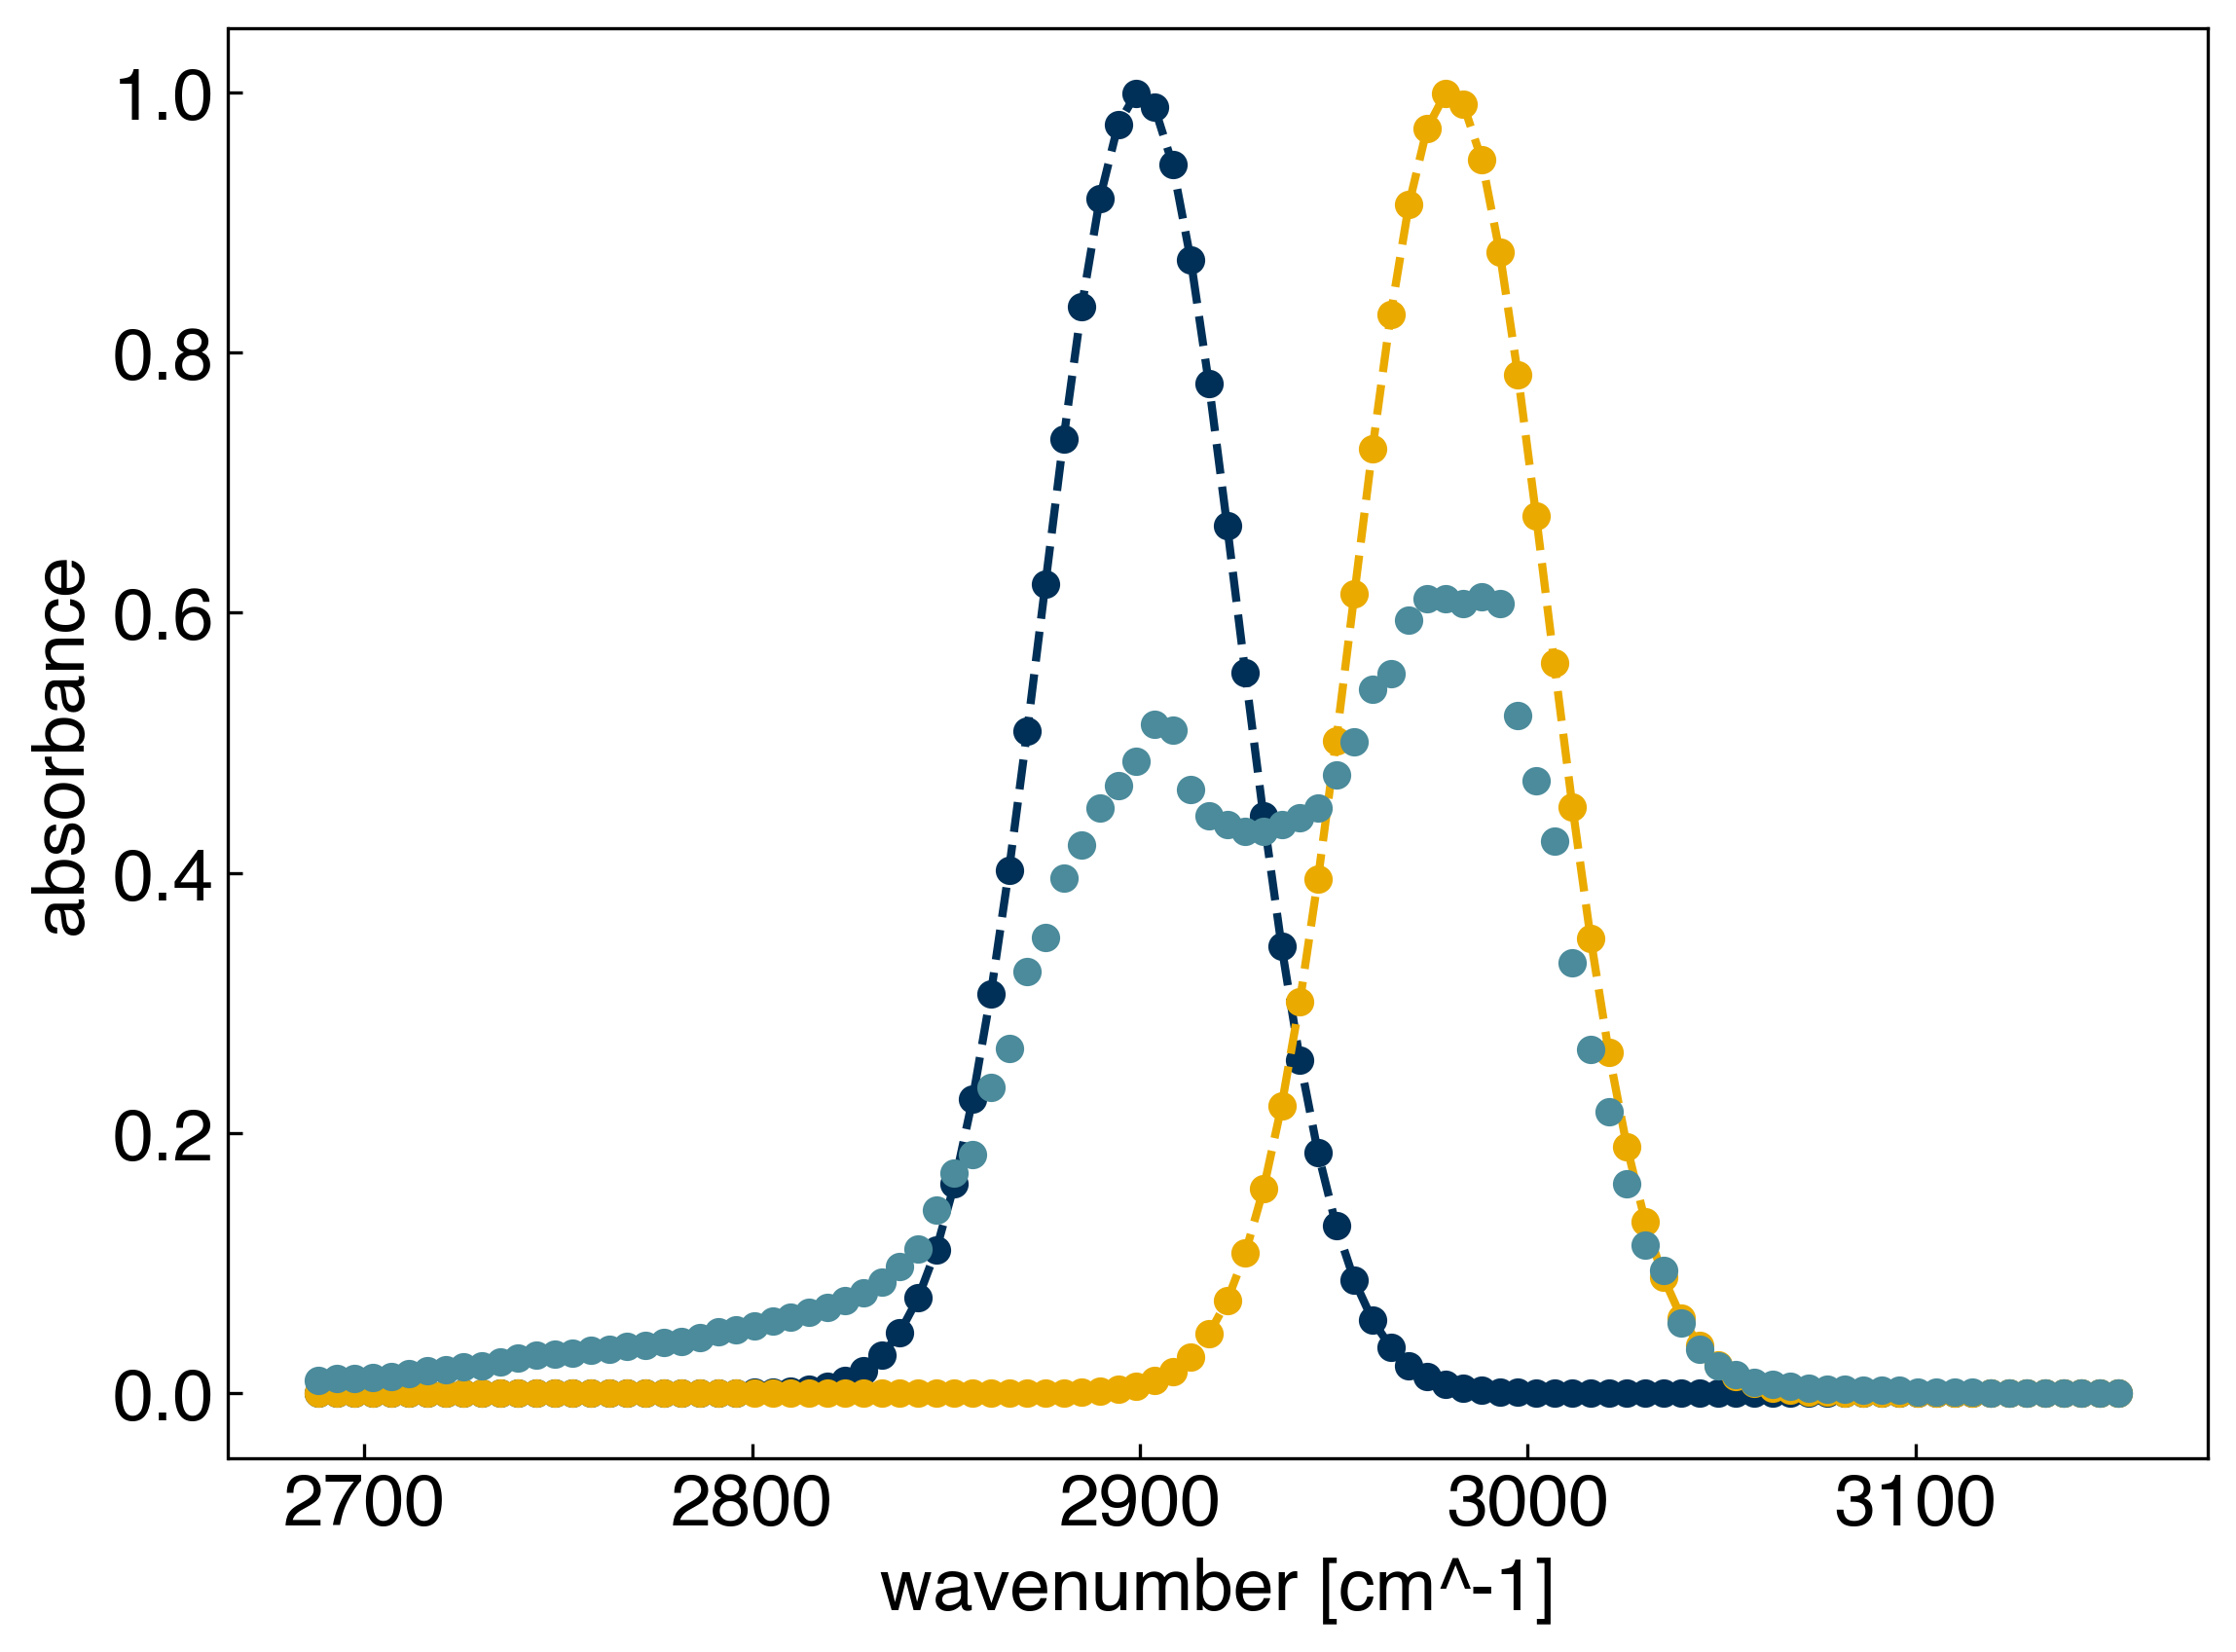

In [18]:
x_peak = x_peak.reshape(-1) #convert x_peak back into a vector
X_gauss = np.zeros((len(x_peak), 2))
X_gauss[:,0] = np.exp(-(x_peak - 2900)**2/(2*(25**2)))
X_gauss[:,1] = np.exp(-(x_peak - 2980)**2/(2*(25**2)))

fig, ax = plt.subplots()
ax.plot(x_peak, X_gauss[:,0])
ax.plot(x_peak, X_gauss[:,1])
ax.plot(x_peak, y_peak, 'o')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

These are our "basis vectors", and our goal is to find the weights that best match the data. We can do this with the same exact math as before!

Weights from least-squares regression: [0.54548962 0.67533912]


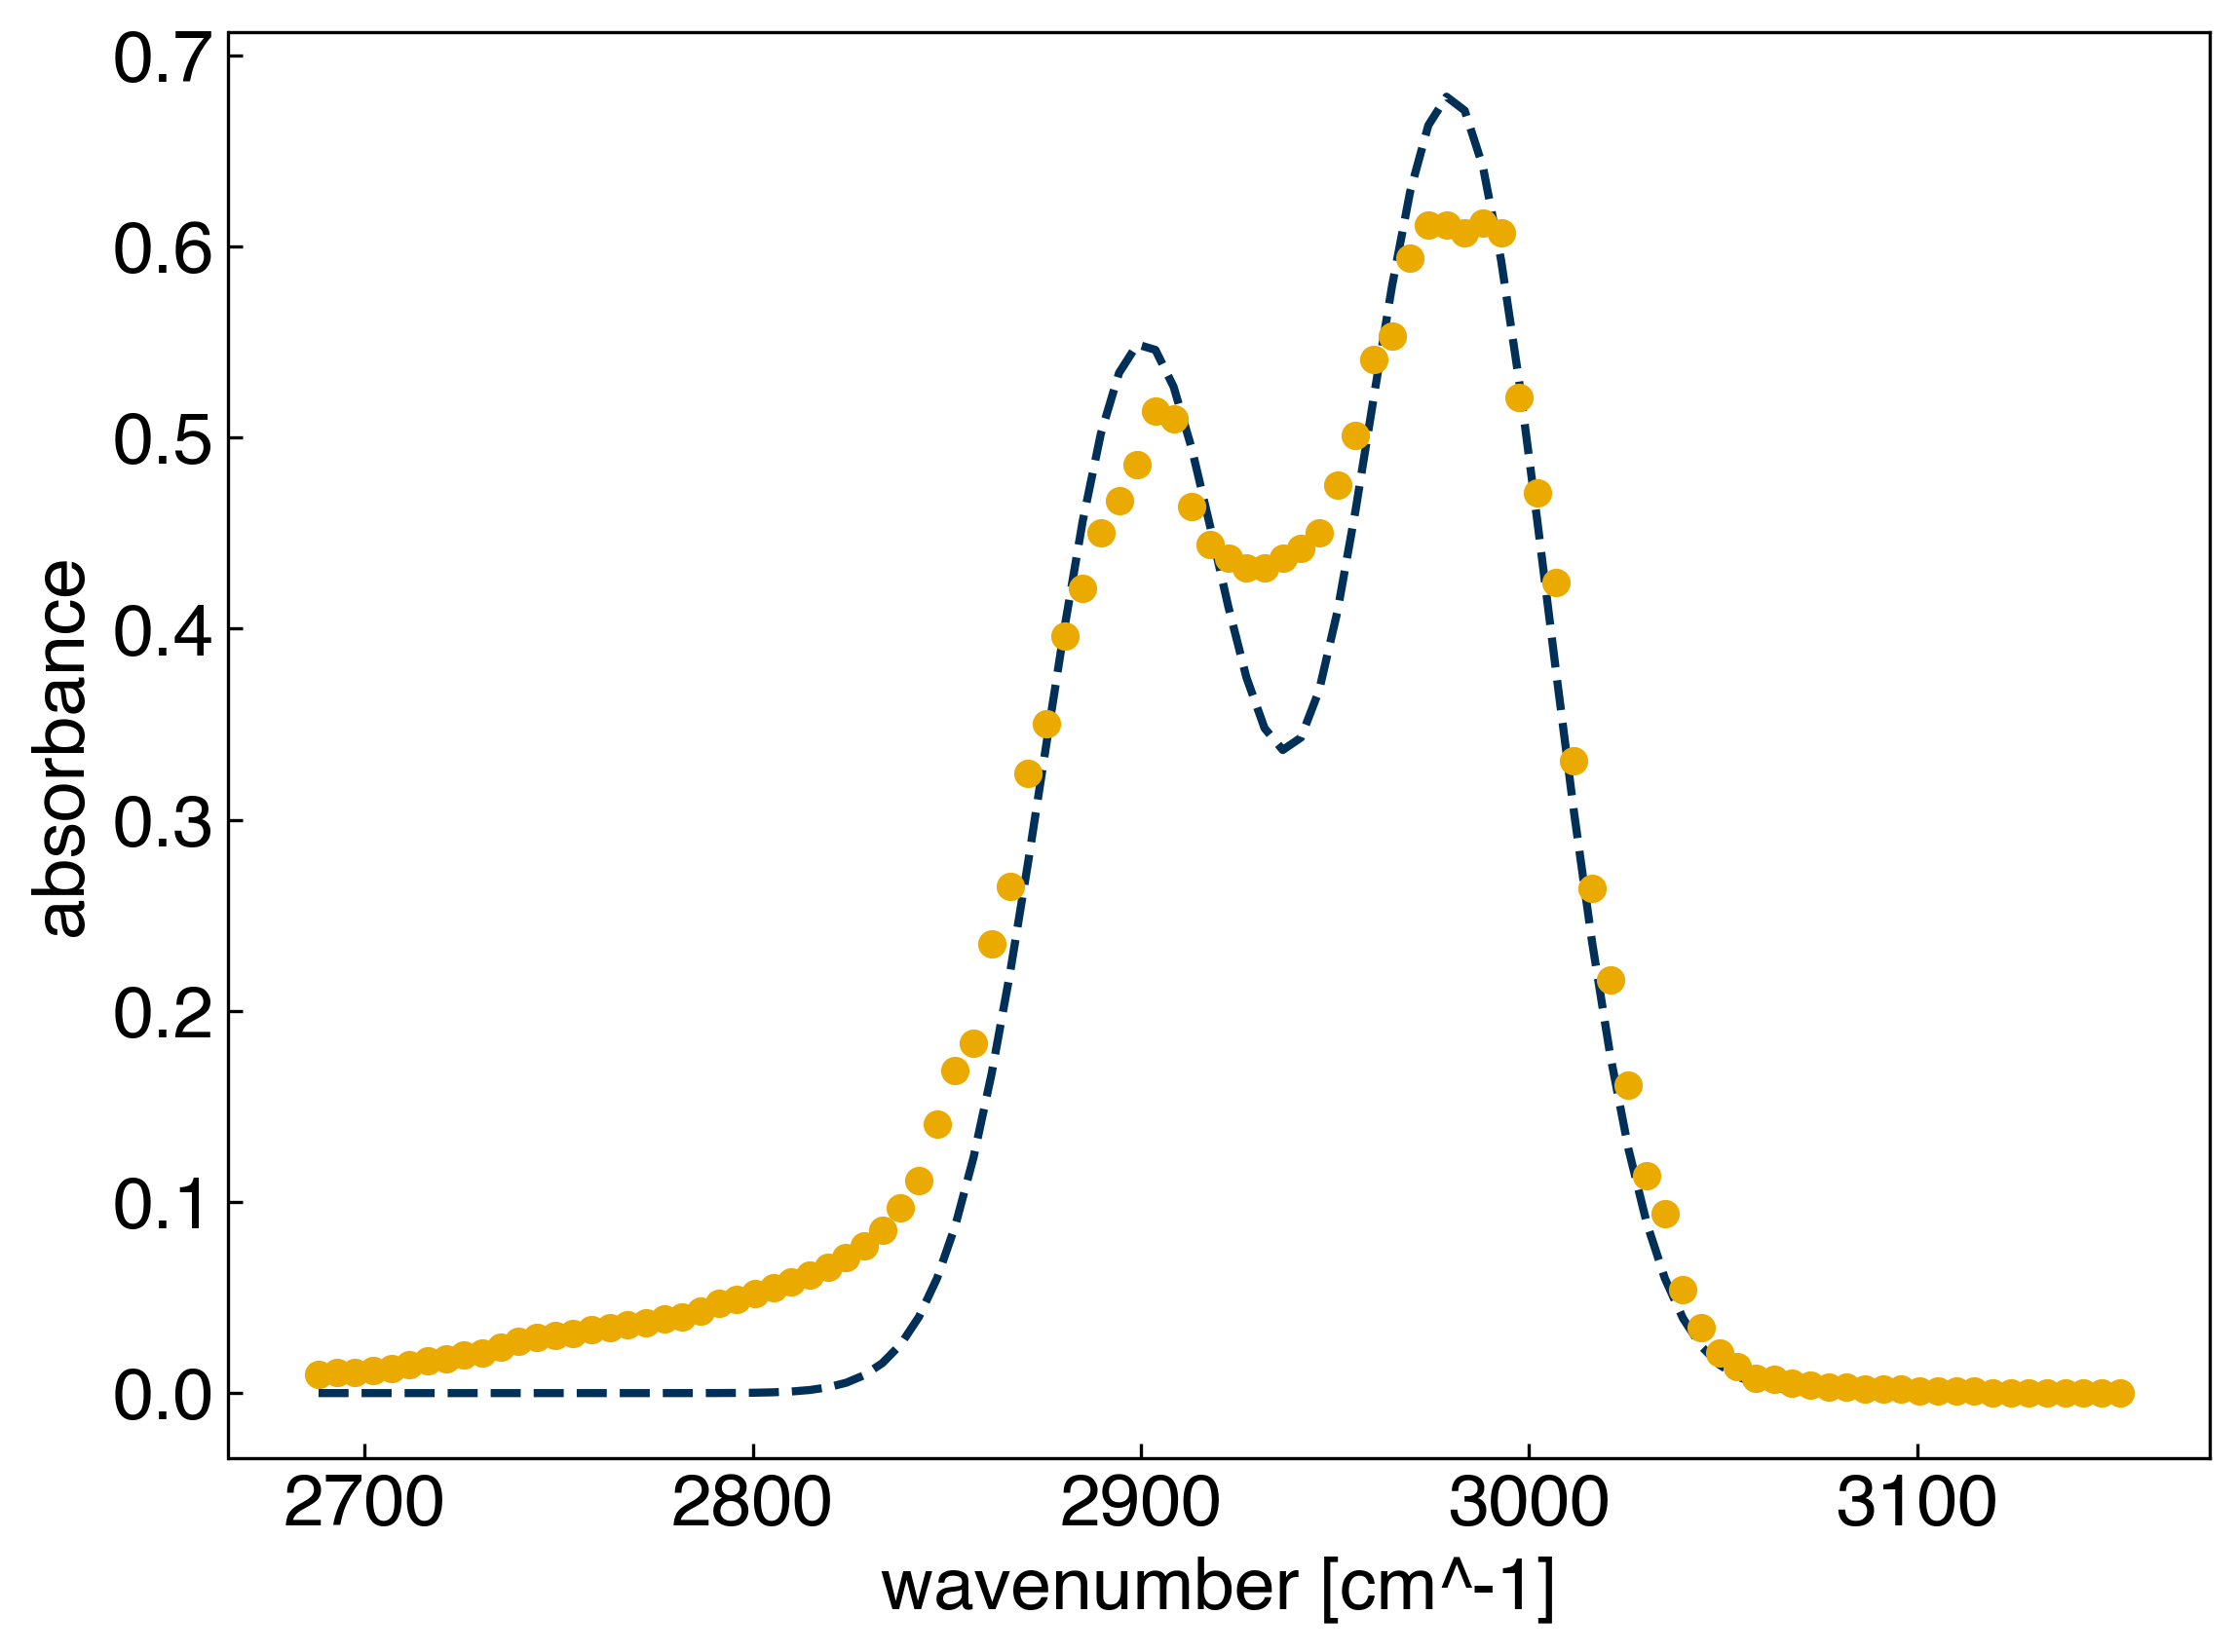

In [19]:
A = X_gauss.T@X_gauss
b = X_gauss.T@y_peak
w_lsr = np.linalg.solve(A,b)
yhat = X_gauss@w_lsr
print('Weights from least-squares regression: {}'.format(w_lsr))

fig, ax = plt.subplots()
ax.plot(x_peak, yhat, '--')
ax.plot(x_peak, y_peak, 'o')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

This looks much better than the polynomial fit, and we only needed 2 parameters! We can also gain some insight from these parameters, since they tell us the relative amounts of the different peaks.

However, this is a little unsatisfying since we did have to know the positions and widths of the peaks, and there are still substantial deviations between the model and the data. We will discuss some other strategies for dealing with this in future lectures, but for now let's see what we can do with the "general linear model" framework.

Let's see what happens if we add more Gaussian peaks. Instead of picking them manually, we can just use a set number of Gaussians with a fixed standard deviation, and space them evenly. We can write a function for this:

In [20]:
def gaussian_features(x, N , sigma = 25):
    # x is a vector
    # sigma is the standard deviation
    x = x.reshape(-1) #ensure that x is a vector
    xk_vec = np.linspace(min(x), max(x), N)
    features = []
    for xk in xk_vec:
        features.append(np.exp(-((x - xk)**2/(2*sigma**2))))
    return np.array(features).T

Note that we have used some significantly different strategies to create our matrix here. There are always multiple ways to do things in Python.

Now we can use the `gaussian_features` function similarly to the `vandermonde` function to create a matrix $\bar{\bar{X}}$ for our general linear model:

Weights: [ 0.00618991  0.01283186  0.02895143  0.02964597  0.08421234  0.42542746
  0.18814892  0.574715    0.02757571 -0.00945447  0.00639036 -0.00400029]
Sum of Squared Errors: 0.007590570362196462


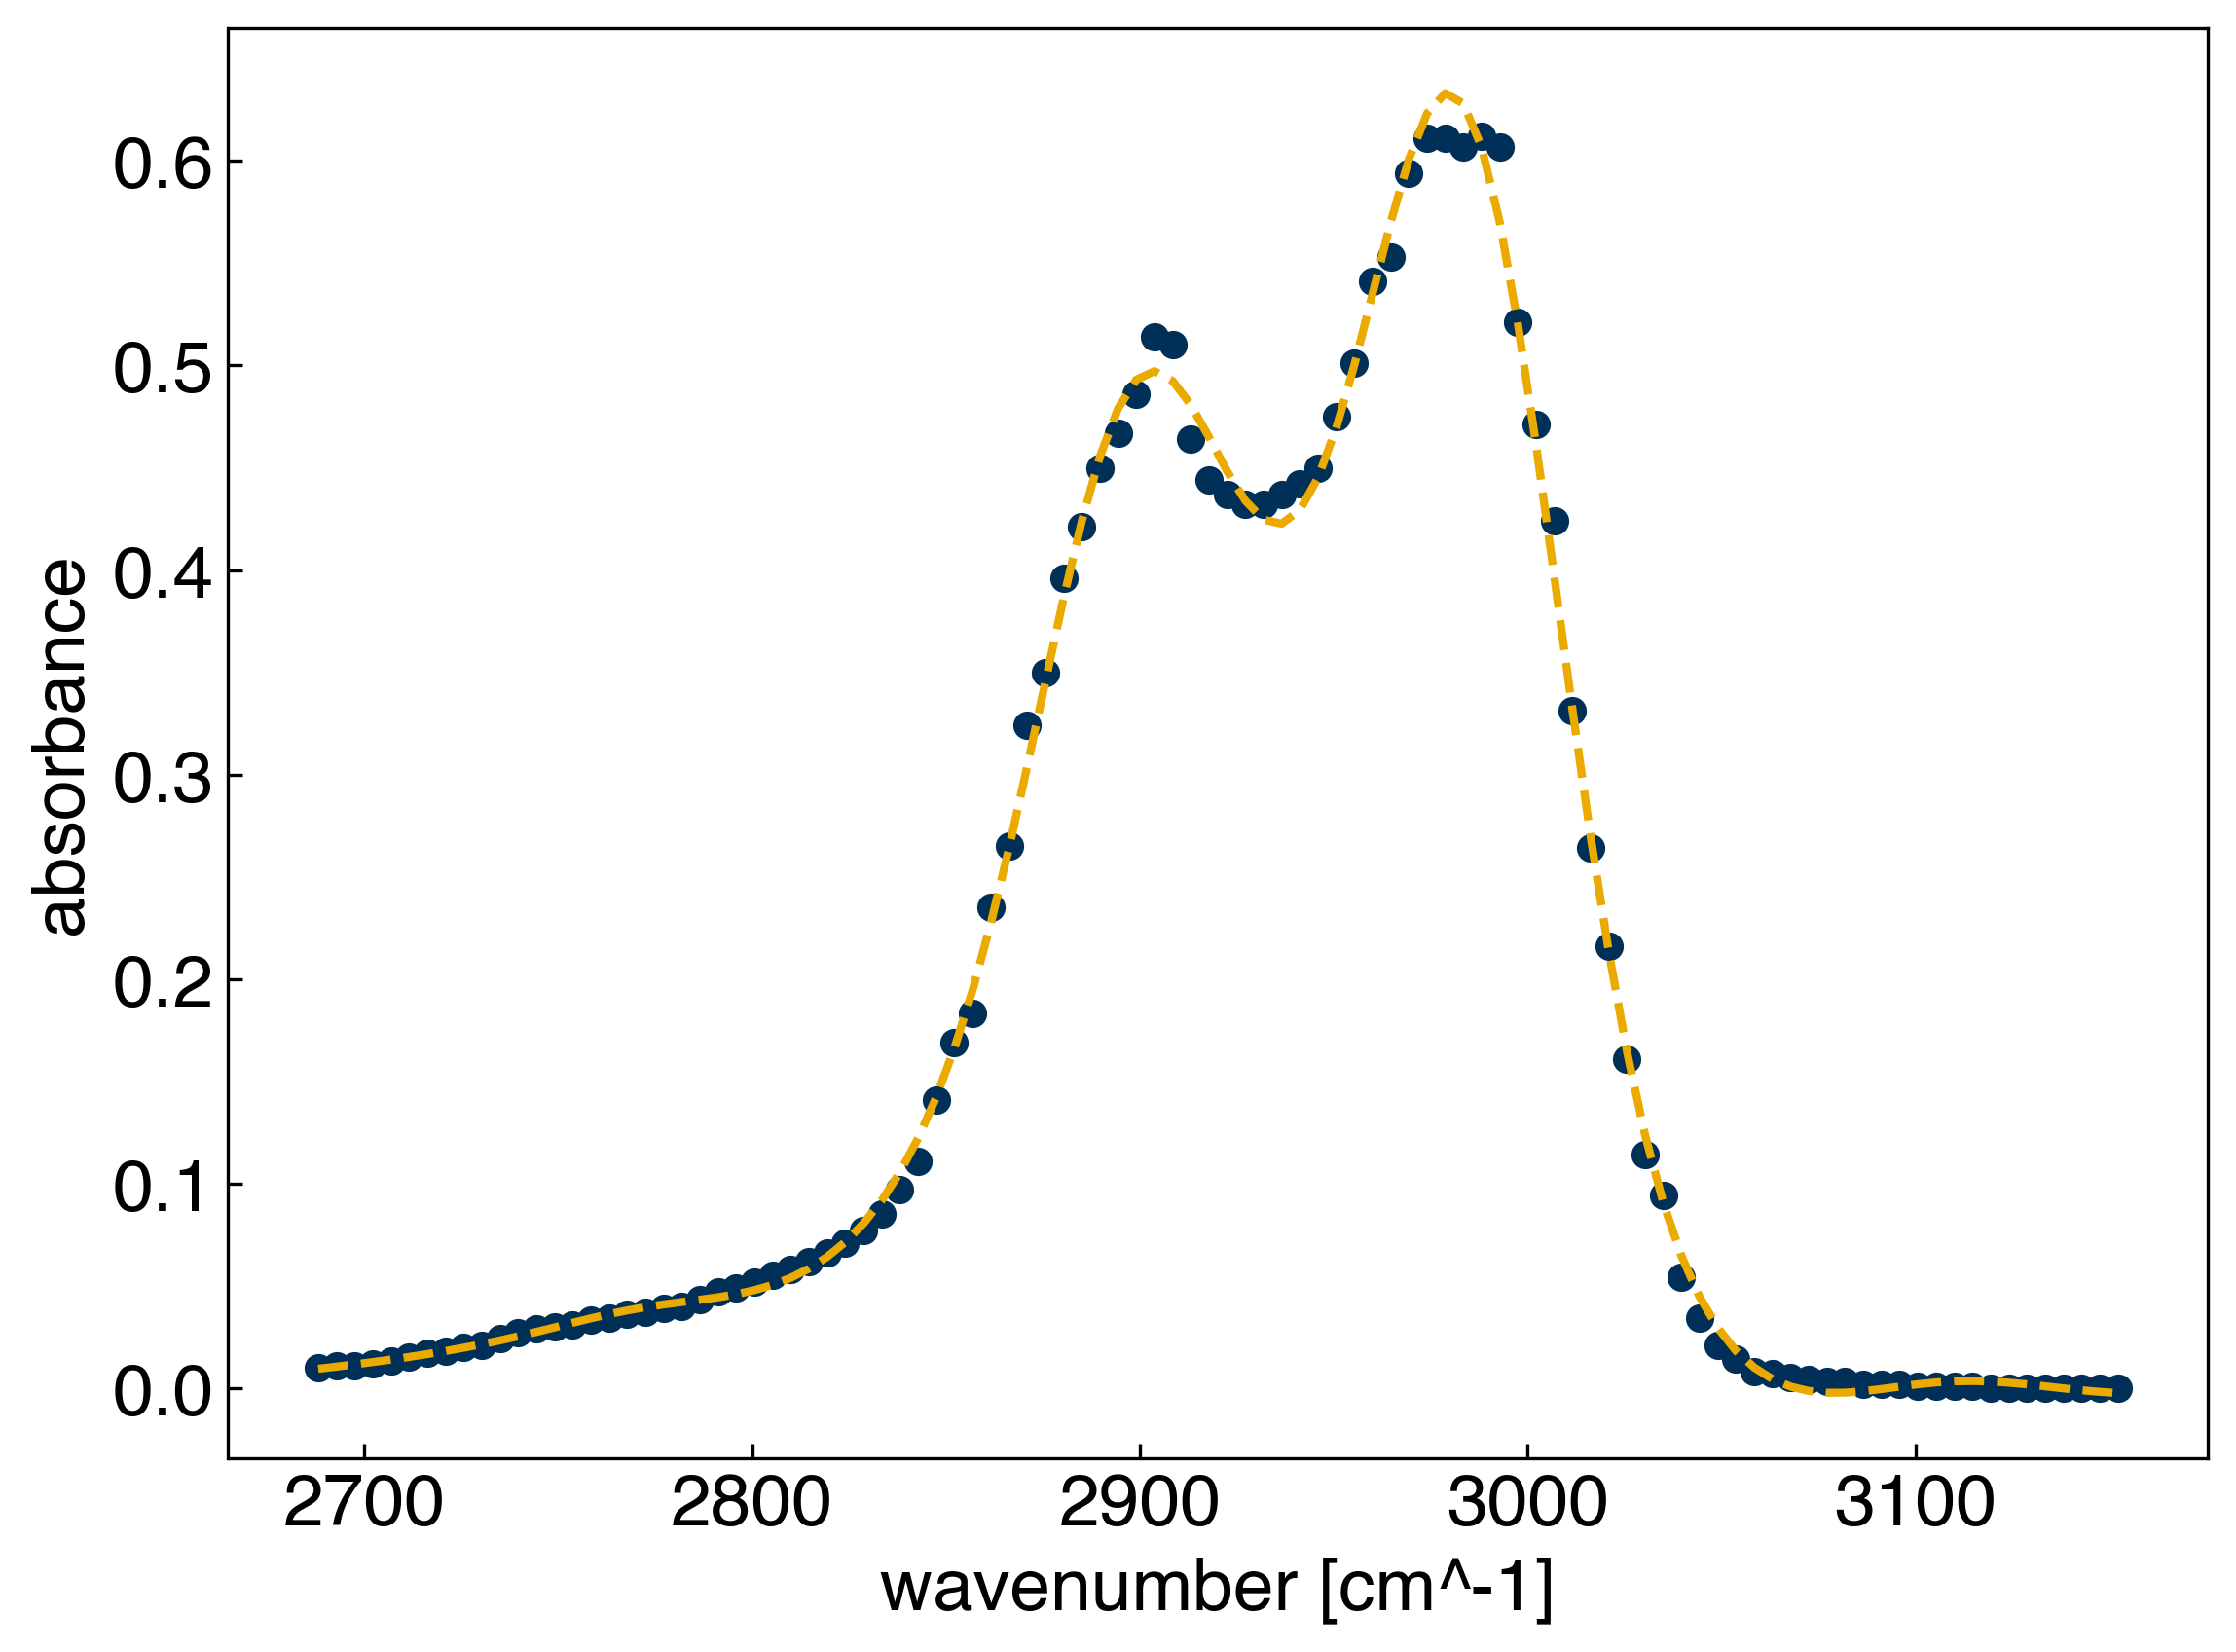

In [21]:
m = 12

X_gauss = gaussian_features(x_peak, m) #generate Vandermonde matrix
b_m = np.dot(X_gauss.T, y_peak) #generate b vector with new features
A_m = np.dot(X_gauss.T, X_gauss) #generate A matrix with new features
w_m = np.linalg.solve(A_m, b_m) #solve Ax=b with new features
print('Weights: {}'.format(w_m))

yhat_m = np.dot(X_gauss, w_m) #compute predictions
SSE_m = np.sum((y_peak - yhat_m)**2) #compute sum of squared errors
print('Sum of Squared Errors: {}'.format(SSE_m))

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat_m, '--')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

Now we see that the fit gets much better as more possible peaks are added. We can look at the $w$ vector to see which peaks have large coefficients and use this to determine where peaks might be. However, there are a few problems with this approach:

1) The peak width is fixed, so it may take multiple Gaussians to represent a wider peak.

2) Some of the coefficients are negative, and we know that peaks should not have negative absorption.

To address these challenges we will need to move beyond general linear regression and use non-linear techniques. This will be explored in the next section.

### Exercise: Plot the Gaussian basis functions used in the previous code block.

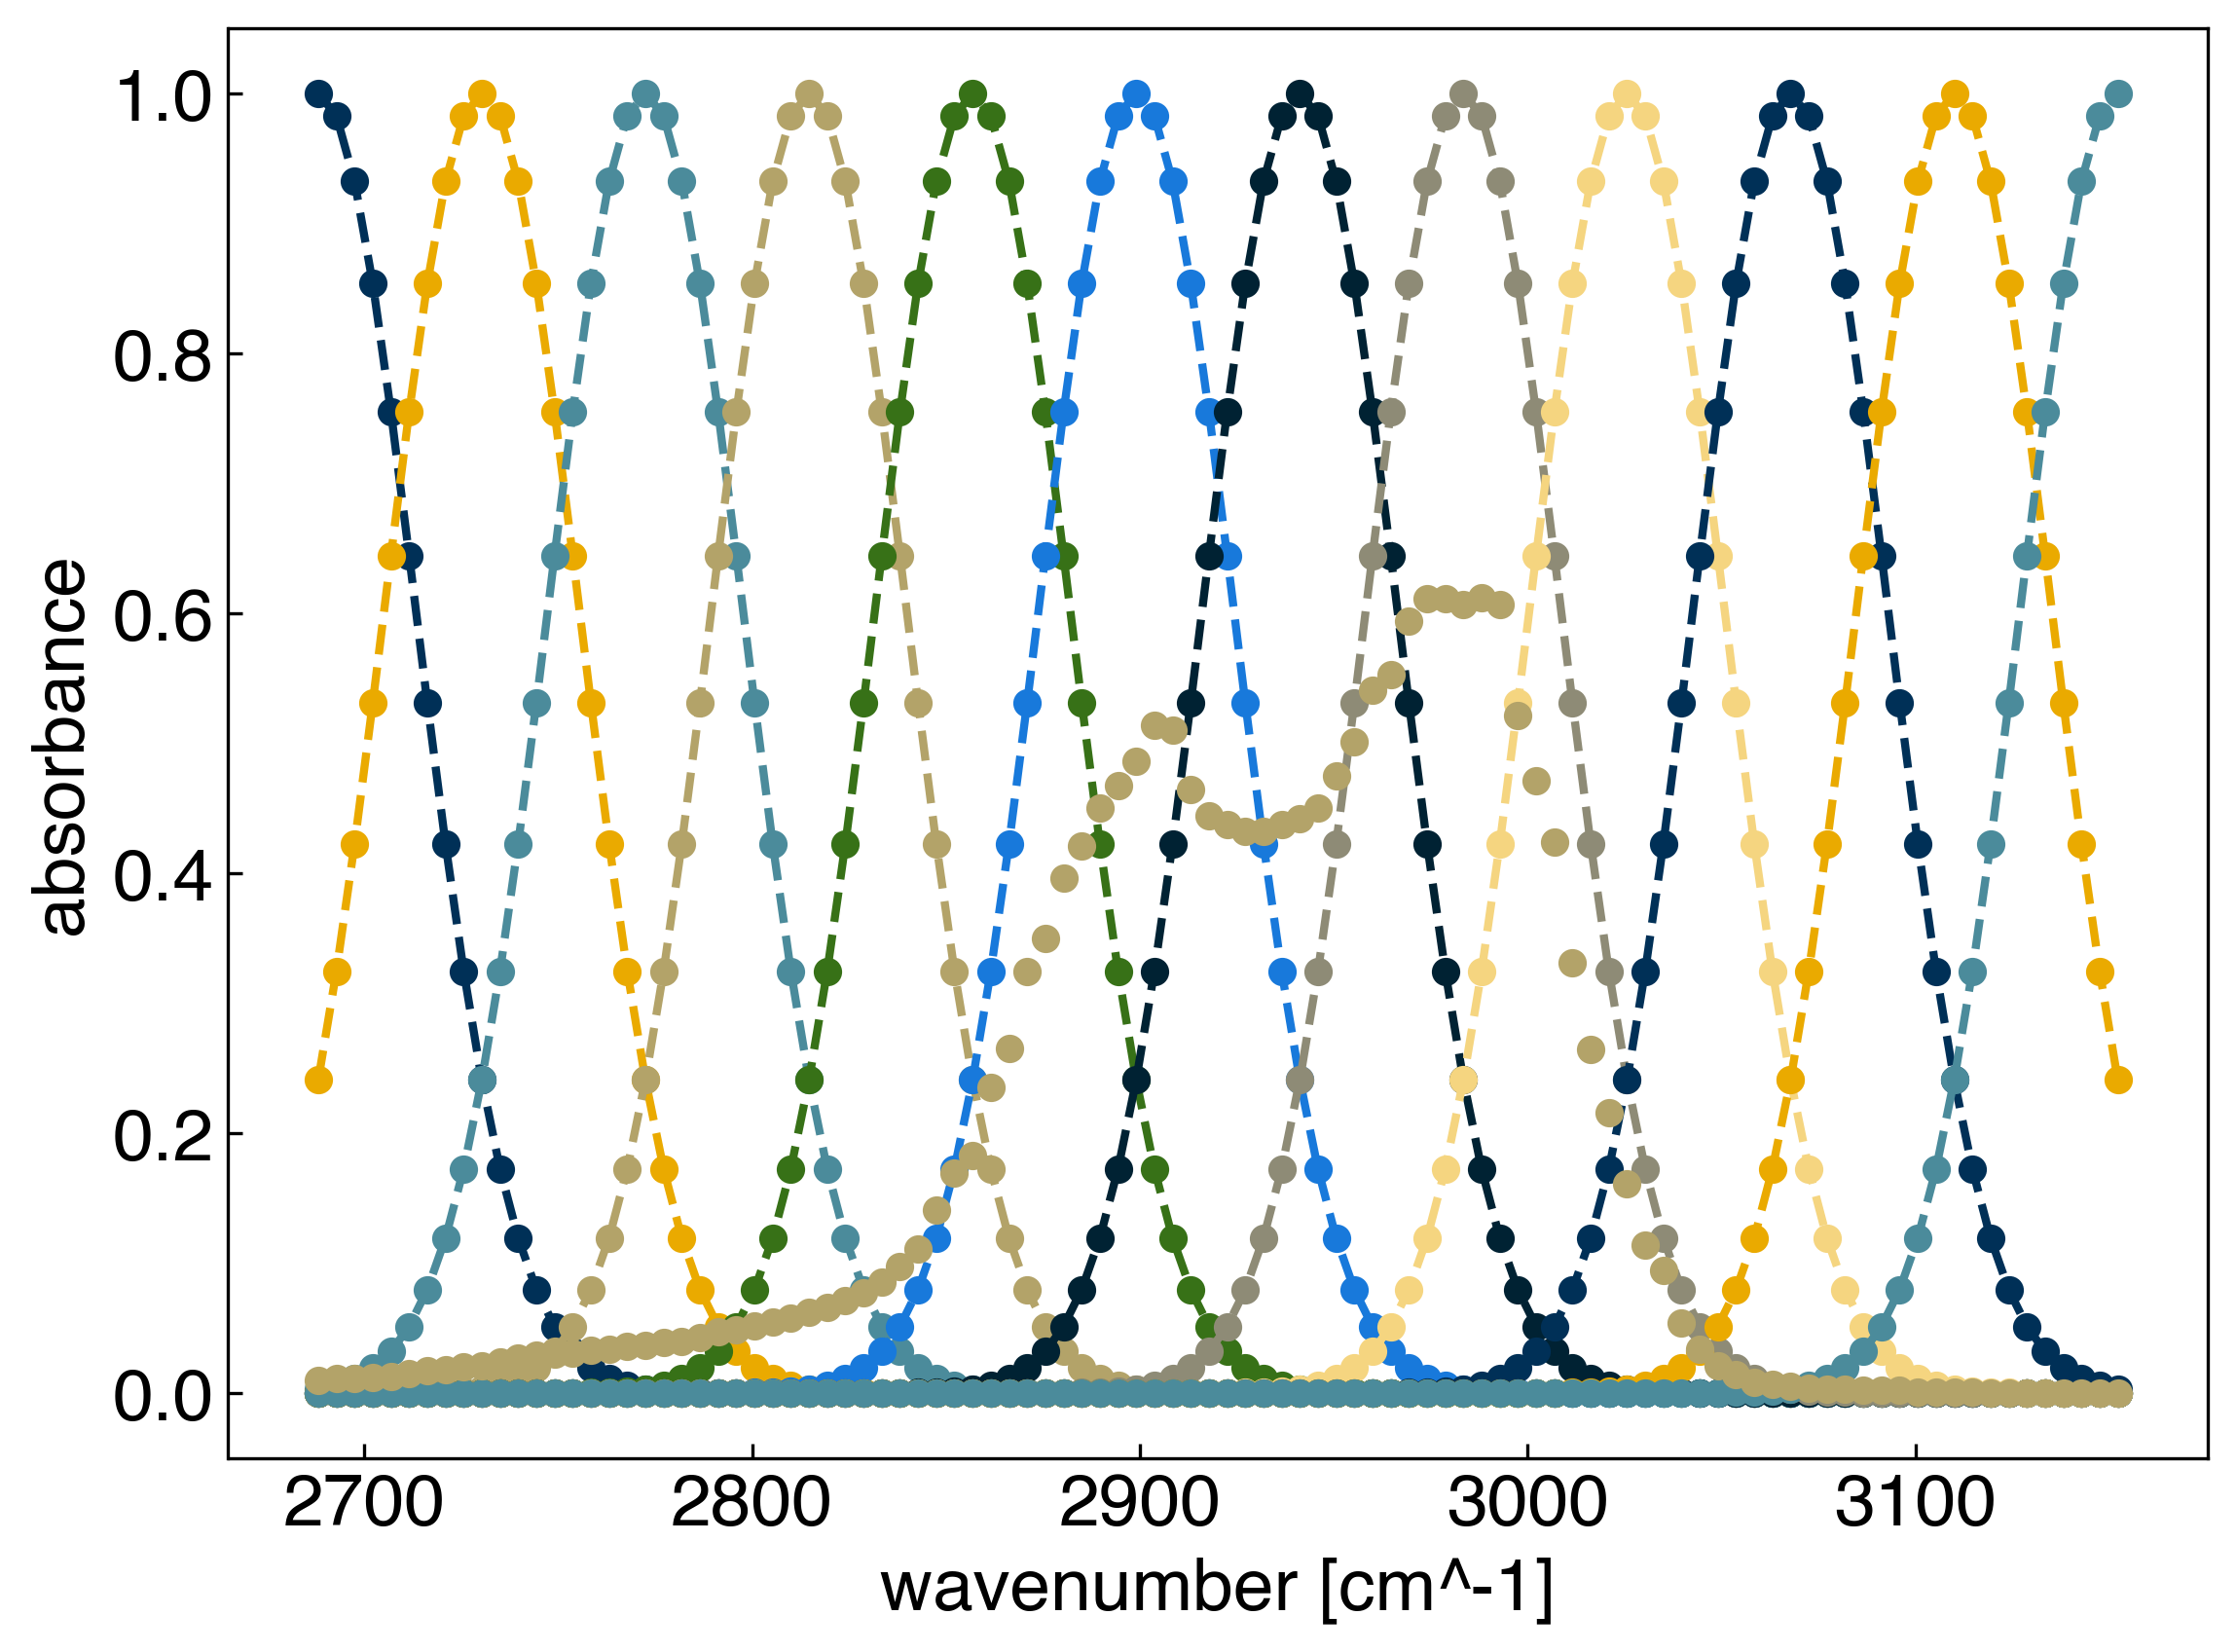

In [22]:
fig, ax = plt.subplots()
for j in range(X_gauss.shape[-1]):
    ax.plot(x_peak, X_gauss[:,j])
ax.plot(x_peak, y_peak, 'o')
ax.set_xlabel('wavenumber [cm^-1]')
ax.set_ylabel('absorbance');

## Linear Regression in Scikit-Learn

So far we have solved our general linear regression models directly from linear algebra. This is relatively easy, but it still requires us to set up a linear system and solve it. There is a very useful Python package called `scikit-learn` that has implementations of many commonly-used algorithms, including general linear models. 

We will introduce `scikit-learn` here to show how it can make things simpler. One thing to note is that `scikit-learn` only solves the regression part of the problem, so we still need to set up the feature matrix, $X_{ij}$. We will keep working with the spectra example, and us the `gaussian_features` function that we wrote earlier:

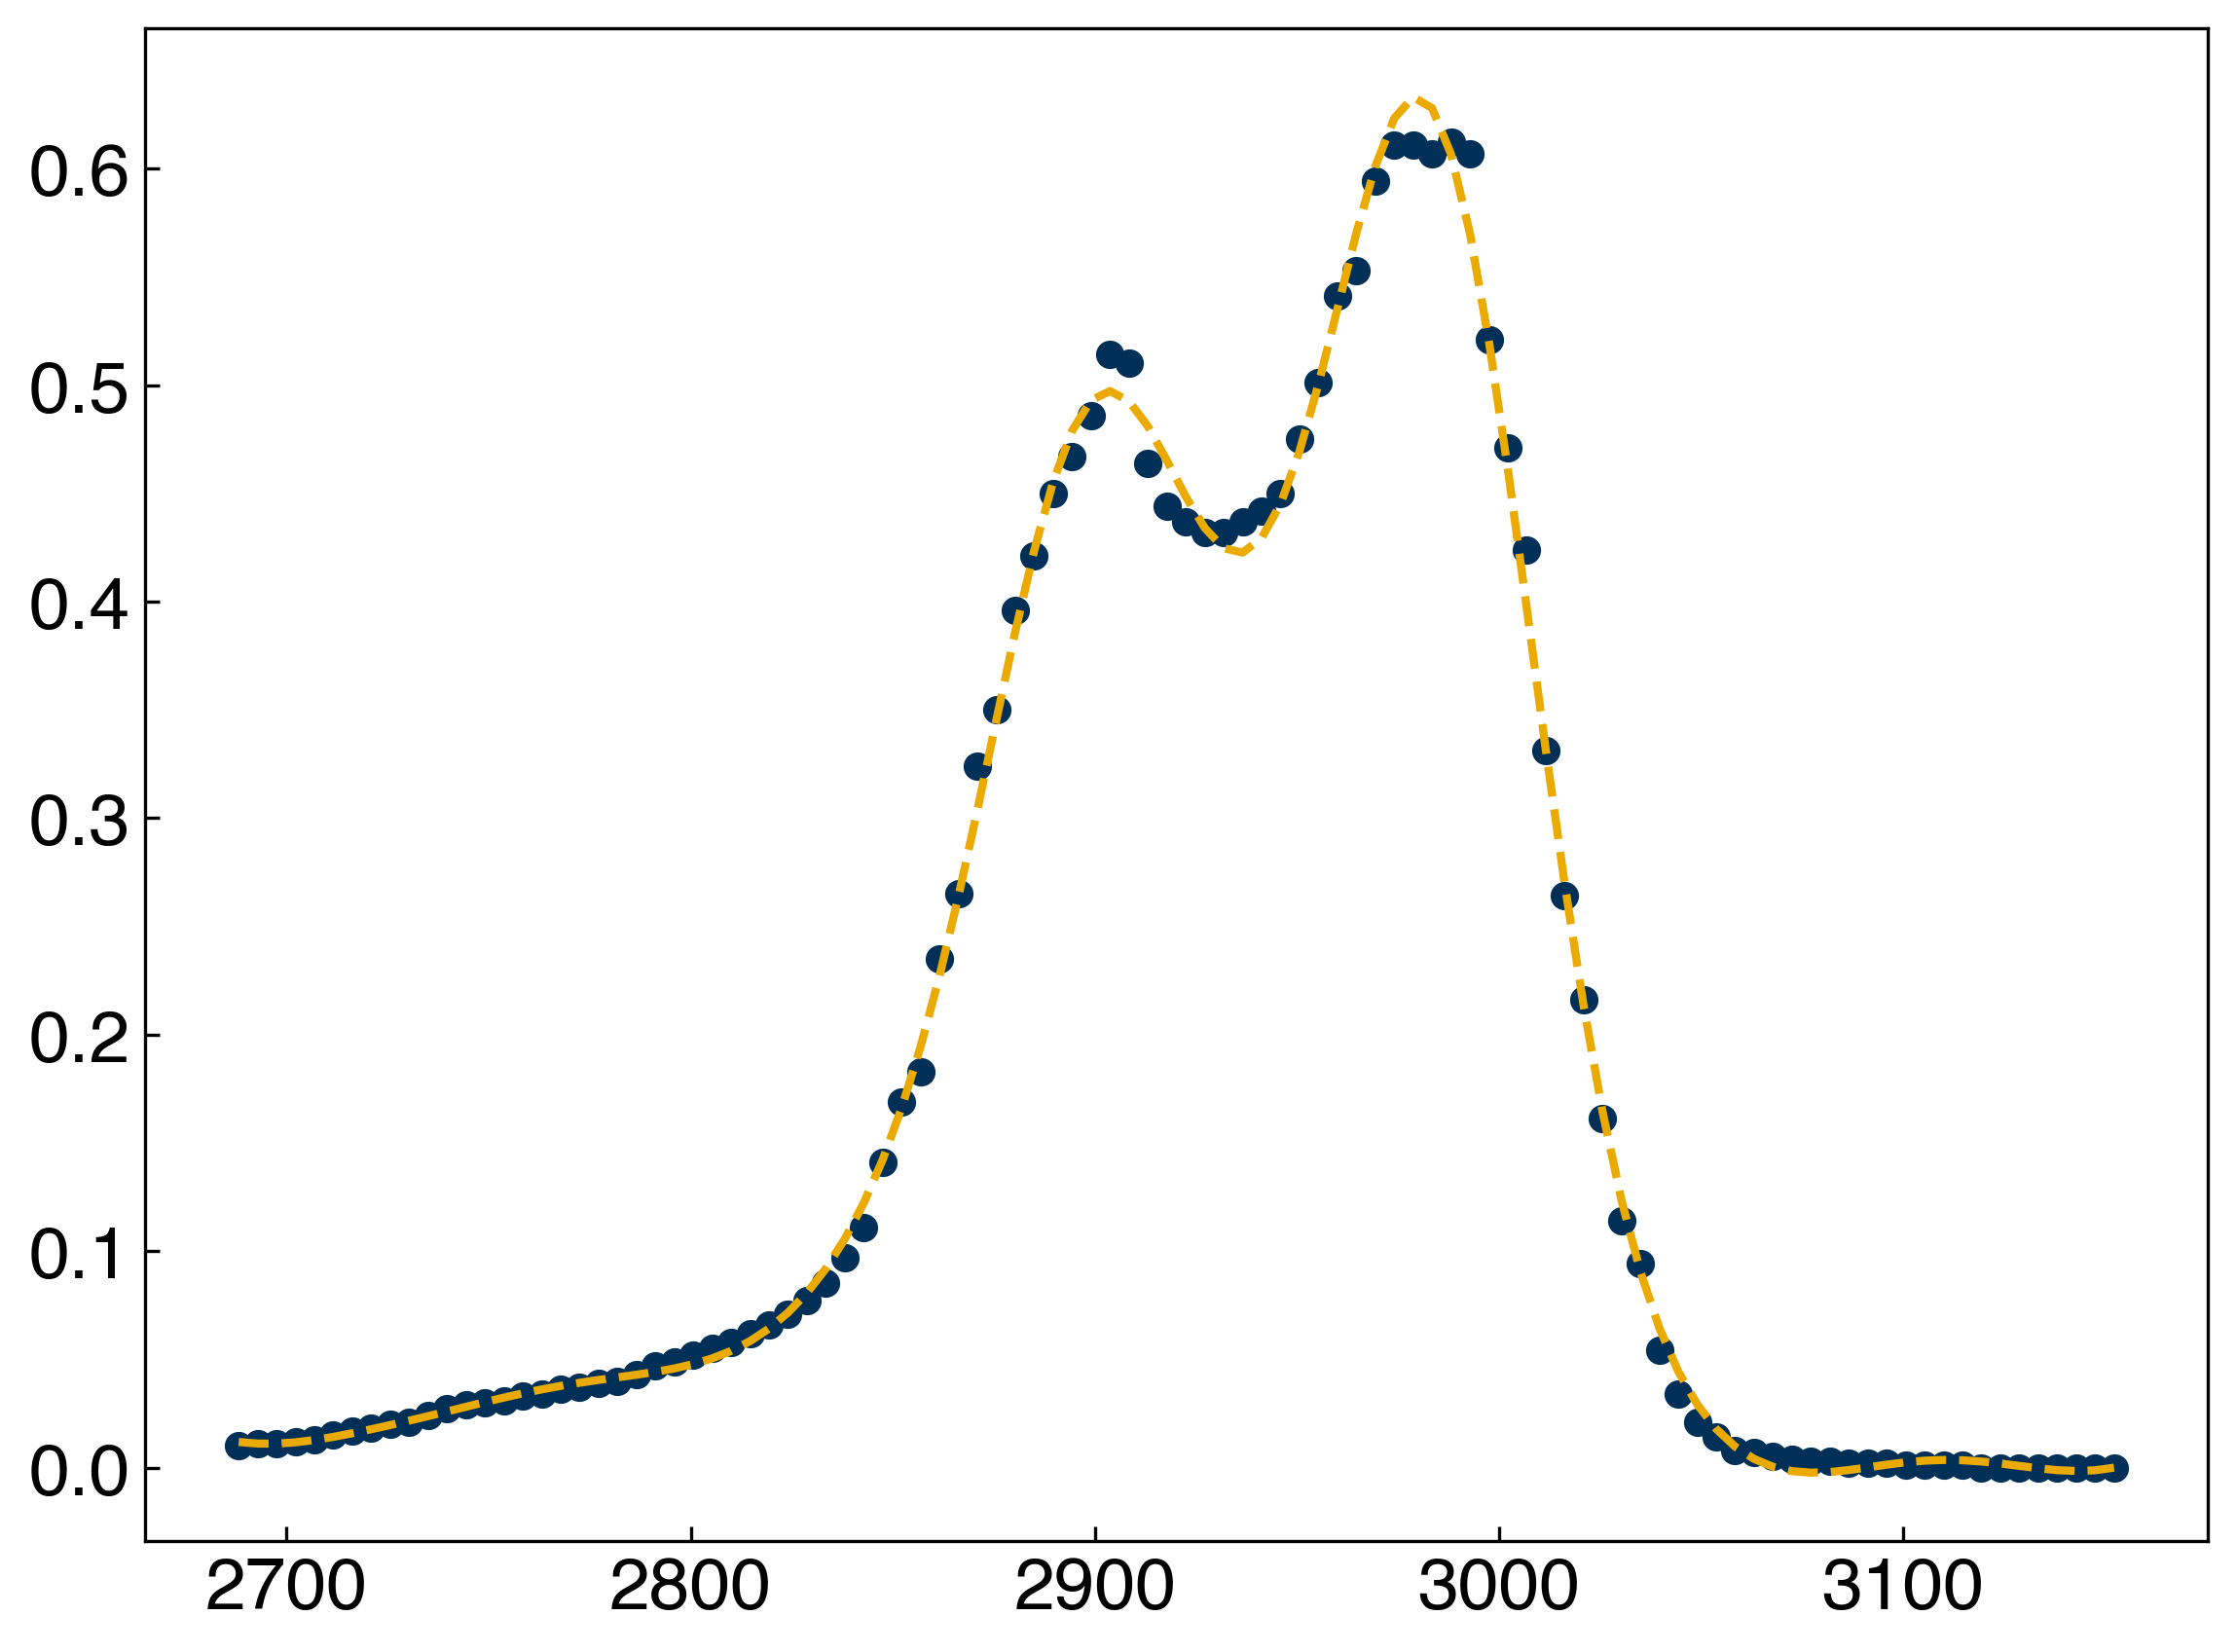

In [23]:
from sklearn.linear_model import LinearRegression

m = 12

X_m = gaussian_features(x_peak,m,sigma=25) #generate features

model = LinearRegression() #create a linear regression model instance

model.fit(X_m, y_peak) #fit the model (equivalent to the linear solve)

yhat = model.predict(X_m) #create the model prediction (equivalent to the matrix multiplication)

fig, ax = plt.subplots()
ax.plot(x_peak, y_peak, 'o')
ax.plot(x_peak, yhat, '--');

We can see that this requires much less code. However, `scikit-learn` is heavily "object" or "class" based, which can make the syntax confusing if you aren't familiar with Python. The advantage is that it is very easy to change the model and compare performance, as we will see in future lectures.